# Introduction
**Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19.COVID-19 is the infectious disease caused by the most recently discovered coronavirus. This new virus and disease were unknown before the outbreak began in Wuhan, China, in December 2019.**

* [Source](http://www.who.int/emergencies/diseases/novel-coronavirus-2019/question-and-answers-hub/q-a-detail/q-a-coronaviruses)
<img src="https://i4.hurimg.com/i/hurriyet/75/0x0/5eb3121e67b0a908d8c64551.jpg" height = "422" width = "750" >

<hr> 

* If you are looking for a more general analysis you can check out my other kernel: [General Analysis of Covid-19](https://www.kaggle.com/mrhippo/general-analysis-of-covid-19)

### Thanks to: 
* [COVID-19 Case Study - Analysis, Viz & Comparisons](https://www.kaggle.com/tarunkr/covid-19-case-study-analysis-viz-comparisons) (Tarun Kumar)
* [Analysis on Coronavirus](https://www.kaggle.com/vanshjatana/analysis-on-coronavirus) (Vansh Jatana)
* [X-Ray Detection](https://www.kaggle.com/vanshjatana/x-ray-detection) (Vansh Jatana)
<hr> 
* This plot shows why we should take **protective measures** and how we can control this situation. 
<img src="https://www.catalannews.com/images/cna/images/2020/03/flattening-the-curve.jpg" height = "422" width = "750" >

[Image Source](https://www.catalannews.com/society-science/item/how-the-health-department-s-new-app-to-monitor-coronavirus-symptoms-works)


<hr>


>## Content
>1. [Imports](#0)
>1. [Datasets and Preprocessing](#1)
>1. [World Map of Covid-19](#2)
>>    1. [Covid-19 in WHO Regions](#3.1)
>>    1. [Covid-19 in Countries](#3.2)
>1. [Comparisons](#4)
>>    1. [WHO Regions](#4.1)
>>    1. [Piecharts of WHO Regions](#4.2)
>>    1. [Countries](#4.3)
>>    1. [Piecharts of Countries](#4.4)
>>    1. [Sorted Cases WHO Regions (Confirmed, Death, Recovered and Active)](#4.5)
>>    1. [Table of WHO Regions](#4.6)
>>    1. [Sorted State Percentages WHO Regions (Death, Recovered and Active Percentages)](#4.7)
>>    1. [Top 10 Countries (Confirmed, Death, Recovered and Active)](#4.8)
>>    1. [Table of Countries](#4.9)
>>    1. [Top 10 Countries in Percentages (Death, Recovered and Active Percentage)](#4.91)
>1. [Predictions](#6)
>>    1. [Confirmed Prediction](#6.1)
>>    1. [Death Prediction](#6.2)
>>    1. [Recovered Prediction](#6.3)
>>    1. [Prediction Table](#6.4)
>1. [LSTM](#7)
>1. [Last 10 Days](#8)
>1. [Covid-19 in 3 Big Countries](#9)
>>    1. [China](#9.1)
>>        1. [Analysis](#9.11)
>>        1. [Prediction](#9.12)
>>            1. [Confirmed Prediction](#9.121)
>>            1. [Death Prediction](#9.122)
>>            1. [Prediction Table](#9.123)
>>        1. [Last 5 Days](#9.13)
>>    1. [United States](#9.2)
>>        1. [Analysis](#9.21)
>>        1. [Prediction](#9.22)
>>            1. [Confirmed Prediction](#9.221)
>>            1. [Death Prediction](#9.222)
>>            1. [Prediction Table](#9.223)
>>        1. [Last 5 Days](#9.23)
>>    1. [United Kingdom](#9.3)
>>        1. [Analysis](#9.31)
>>        1. [Prediction](#9.32)
>>            1. [Confirmed Prediction](#9.321)
>>            1. [Death Prediction](#9.322)
>>            1. [Prediction Table](#9.323)
>>        1. [Last 5 Days](#9.33)
>1. [Patient Data](#10)
>1. [Covid-19 Classification From Lungs X-Rays](#11)
>>    1. [CNN Model](#11.1)
>>    1. [Training](#11.2)
>>    1. [Result](#11.3)
>>    1. [Confusion Matrix](#11.4)
>1. [Conclusion](#12)

<a id="0"></a> <br>
# Imports
* **Numpy:** Linear algebra - used sections: All
* **Pandas:** Data manuplation and data science - used sections: All
* **Matplotlib:** Simple visualization - used sections: All
* **Seaborn:** Visualization - used sections: Analysis, Covid-19 Classification From Lung X-Rays
* **Plotly:** Interactive plots - used sections: Except Predictions, LSTM, Covid-19 Classification From Lung X-Rays All
* **Datetime:** Time data manuplation - used sections: Analysis, Predictions 
* **Keras:** Deep learning - used sections: Predictions, LSTM, Covid-19 in 3 Big Countries, Covid-19 Classification From Lung X-Rays

In [ ]:
# data science and visualization / used sections: Maps, Analysis, Comparisons, Top 10s, Patient Data
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import plotly.graph_objs as go 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.express as px
import glob
init_notebook_mode(connected=True) 
import warnings
warnings.filterwarnings('ignore')
from datetime import date, timedelta, datetime

# deep learning (keras) / used sections: Predictions, Covid-19 in 3 Big Countries
from keras.layers import Input, Dense, Activation, LeakyReLU, Dropout
from keras import models
from keras.optimizers import RMSprop, Adam
# LSTM (keras) / used sections: LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout
import math
# CNN (keras and tensorflow) / used sections: Covid-19 Classification From Lung X-Rays
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<a id="1"></a> <br>
# Datasets and Preprocessing

In [ ]:
data = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv")
data2 = pd.read_csv("/kaggle/input/corona-virus-report/covid_19_clean_complete.csv")
df_confirmed = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
df_death = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")
df_recovered = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv")

In [ ]:
df_confirmed.head()

In [ ]:
df_death.head()

In [ ]:
df_recovered.head()

In [ ]:
patient = pd.read_csv("/kaggle/input/patient/patient.csv")
patient = patient.drop(["group", "infection_order","infected_by","contact_number","confirmed_date","released_date","deceased_date"],axis = 1)
patient["age"] = 2020 - patient["birth_year"]

patient.head()

In [ ]:
patient.describe()

In [ ]:
patient.info()

In [ ]:
data = data.drop(["Last Update"],axis = 1) #we will not use last update
data.head()

In [ ]:
data["Active"] = data["Confirmed"] - data["Deaths"] - data["Recovered"]
data.tail()

In [ ]:
data.describe()

In [ ]:
from datetime import date, timedelta, datetime
data["ObservationDate"] = pd.to_datetime(data["ObservationDate"])
data.info()

In [ ]:
data2["Date"] = pd.to_datetime(data2["Date"])
data2.info()

<a id="2"></a> <br>
# World Map of Covid-19 

In [ ]:
import plotly.express as px
grp = data.groupby(["ObservationDate","Country/Region"])["Confirmed","Deaths","Recovered"].max()
grp = grp.reset_index()
grp["ObservationDate"] = grp["ObservationDate"].dt.strftime("%m,%d,%Y")
grp["Active"] = grp["Confirmed"] - grp["Recovered"] - grp["Deaths"]
grp["Country"] = grp["Country/Region"]

fig = px.choropleth(grp, locations= "Country", locationmode = "country names",
                 color = "Confirmed", hover_name = "Country/Region",hover_data = [grp.Recovered, grp.Deaths, grp.Active],projection = "natural earth",
                 animation_frame = "ObservationDate",
                 color_continuous_scale = "Reds",
                 range_color = [10000,200000],
                 
                 title = "Covid-19 World Map")
fig.update(layout_coloraxis_showscale=True)
iplot(fig)

* As you can see on the animation **Covid-19** starts spreading from **China** and spreads other countries by vehicles. 

In [ ]:
data_last = data.tail(1)
data_last_day = data[data["ObservationDate"] == data_last["ObservationDate"].iloc[0]] 
country_list = list(data_last_day["Country/Region"].unique())
confirmed = []
deaths = []
recovered = []
active = []
for i in country_list:
    x = data_last_day[data_last_day["Country/Region"] == i]
    confirmed.append(sum(x["Confirmed"]))
    deaths.append(sum(x["Deaths"]))
    recovered.append(sum(x["Recovered"]))
    active.append(sum(x["Active"]))
data_maps = pd.DataFrame(list(zip(country_list,confirmed,deaths,recovered,active)),columns = ["Country/Region","Confirmed","Deaths","Recovered","Active"])

<a id="3"></a> <br>
# Analysis

In [ ]:
date_list1 = list(data["ObservationDate"].unique())
confirmed = []
deaths = []
recovered = []
active = []
for i in date_list1:
    x = data[data["ObservationDate"] == i]
    confirmed.append(sum(x["Confirmed"]))
    deaths.append(sum(x["Deaths"]))
    recovered.append(sum(x["Recovered"]))
    active.append(sum(x["Active"]))
data_glob = pd.DataFrame(list(zip(date_list1,confirmed,deaths,recovered,active)),columns = ["Date","Confirmed","Deaths","Recovered","Active"])
data_glob.head()

In [ ]:
report_covid_global = data_glob.tail(1)
print("=======Global Covid-19 Report=======\nDate: {}\nTotal Confirmed: {}\nTotal Deaths: {}\nTotal Recovered: {}\nTotal Active: {}\n====================================".format(report_covid_global["Date"].iloc[0],int(report_covid_global["Confirmed"].iloc[0]),int(report_covid_global["Deaths"].iloc[0]),int(report_covid_global["Recovered"].iloc[0]),int(report_covid_global["Active"].iloc[0])))

In [ ]:
trace1 = go.Scatter(
x = data_glob["Date"],
y = data_glob["Confirmed"],
mode = "lines",
name = "Confirmed",
line = dict(width = 2.5),
marker = dict(color = 'rgba(4,90,141, 0.8)')
)

trace2 = go.Scatter(
x = data_glob["Date"],
y = data_glob["Deaths"],
mode = "lines",
name = "Deaths",
line = dict(width = 2.5),
marker = dict(color = 'rgba(152,0,67, 0.8)')
)

trace3 = go.Scatter(
x = data_glob["Date"],
y = data_glob["Recovered"],
mode = "lines",
name = "Recovered",
line = dict(width = 2.5),    
marker = dict(color = 'rgba(1,108,89, 0.8)')
)

trace4 = go.Scatter(
x = data_glob["Date"],
y = data_glob["Active"],
mode = "lines",
name = "Active",
line = dict(width = 2.5),
marker = dict(color = 'rgba(84,39,143, 0.8)')
)

data_plt = [trace1,trace2,trace3,trace4]
layout = go.Layout(title = "Global Case States",template = "plotly_white",xaxis_title="Date",yaxis_title="Number of Total Cases",legend=dict(
        x=0,
        y=1,),hovermode='x unified')
    
fig = go.Figure(data = data_plt,layout = layout)

iplot(fig)

* On this plot **confirmed cases** are increasing so fast but our **recovery** is increasing too. 

In [ ]:
trace1 = go.Scatter(
x = data_glob["Date"],
y = np.log10(data_glob["Confirmed"]),
mode = "lines",
name = "Confirmed",
line = dict(width = 2.5),
marker = dict(color = 'rgba(4,90,141, 0.8)')
)

trace2 = go.Scatter(
x = data_glob["Date"],
y = np.log10(data_glob["Deaths"]),
mode = "lines",
name = "Deaths",
line = dict(width = 2.5),
marker = dict(color = 'rgba(152,0,67, 0.8)')
)

trace3 = go.Scatter(
x = data_glob["Date"],
y = np.log10(data_glob["Recovered"]),
mode = "lines",
name = "Recovered",
line = dict(width = 2.5),    
marker = dict(color = 'rgba(1,108,89, 0.8)')
)

trace4 = go.Scatter(
x = data_glob["Date"],
y = np.log10(data_glob["Active"]),
mode = "lines",
name = "Active",
line = dict(width = 2.5),
marker = dict(color = 'rgba(84,39,143, 0.8)')
)

data_plt = [trace1,trace2,trace3,trace4]
layout = go.Layout(title = "Global Case States (Log Scale)",template = "plotly_white",xaxis_title="Date",yaxis_title="Number of Total Cases (Log Scale)",legend=dict(
        x=0,
        y=1,),hovermode='x unified')
fig = go.Figure(data = data_plt,layout = layout)

iplot(fig)

In [ ]:
labels = ["Recovered","Deaths","Active"]
values = [data_glob.tail(1)["Recovered"].iloc[0],data_glob.tail(1)["Deaths"].iloc[0],data_glob.tail(1)["Active"].iloc[0]]

fig = go.Figure(data = [go.Pie(labels = labels, values = values,pull = [0.05,0.05,0.05],textinfo='label+percent',insidetextorientation='radial')],layout = go.Layout(title = "Global Patient Percentage"))
fig.show()

In [ ]:
data_daily_confirmed = np.nan_to_num(df_confirmed.sum()[5:].diff())
data_daily_death = np.nan_to_num(df_death.sum()[5:].diff())
data_daily_recovered = np.nan_to_num(df_recovered.sum()[5:].diff())

dates = np.arange(0, len(data_daily_confirmed))

fig = go.Figure(data = [go.Scatter(x = dates,
                                  y = data_daily_confirmed,
                                  name = "Confirmed",
                                  mode = "lines",
                                  marker = dict(color = 'rgba(4,90,141, 0.8)')),
                       go.Scatter(x = dates,
                                  y = data_daily_death,
                                  name = "Deaths",
                                  mode = "lines",
                                  marker = dict(color = 'rgba(152,0,67, 0.8)')),
                       go.Scatter(x = dates,
                                  y = data_daily_recovered,
                                  name = "Recovered",
                                  mode = "lines",
                                  marker = dict(color = 'rgba(1,108,89, 0.8)'))], 
                layout = go.Layout(template = "plotly_white",
                                xaxis_title="Days",
                                yaxis_title="Number of Cases", 
                                title = "Daily Cases",
                                legend=dict(x=0,y=1,),
                                hovermode='x unified'))

iplot(fig)

In [ ]:
fig = make_subplots(rows=3,cols=1,subplot_titles = ("Daily Confirmed","Daily Death","Daily Recovered"))

fig.append_trace(go.Box(
                  y = data_daily_confirmed,
                  name = "Daily Confirmed",
                  boxmean = "sd",
                  marker = dict(color = 'rgba(4,90,141, 0.8)')),row = 1, col = 1)

fig.append_trace(go.Box(
                  y = data_daily_death,
                  name = "Daily Death",
                  boxmean = "sd",
                  marker = dict(color = 'rgba(152,0,67, 0.8)')),row = 2, col = 1)
          
fig.append_trace(go.Box(
                  y = data_daily_recovered,
                  name = "Daily Recovered",
                  boxmean = "sd",
                  marker = dict(color = 'rgba(1,108,89, 0.8)')),row = 3, col = 1)
          
fig.update_layout(height = 1200, title = "Daily Cases Boxplots",template="plotly_white")

iplot(fig)

In [ ]:
moving_average_short = []
moving_average_long = []

for i in range(1, len(data_daily_confirmed)):
    moving_average_short.append(data_daily_confirmed[i:i+10].mean())
    moving_average_long.append(data_daily_confirmed[i:i+25].mean())

dates2 = np.arange(1, len(data_daily_confirmed))
    
fig = go.Figure(data = [go.Bar(x = dates,
                              y = data_daily_confirmed,
                              name = "Daily Confirmed",
                              marker = dict(color = 'rgba(4,90,141, 0.8)')),
                       go.Scatter(x = dates2,
                              y = moving_average_short,
                                 mode = "lines",
                                 name = "Moving Average Short (10 days)",),
                       go.Scatter(x = dates2,
                              y = moving_average_long,
                                 mode = "lines",
                       name = "Moving Average Long (25 days)")],
               layout = go.Layout(template = "plotly_white",
                                xaxis_title="Days",
                                yaxis_title="Number of Cases", 
                                title = "Daily Confirmed Cases",
                                legend=dict(x=0,y=1,),
                                hovermode='x unified',
                                annotations=[
                                            dict(
                                                x=26,
                                                y=data_daily_confirmed[1:].mean() + 10000,
                                                xref="x",
                                                yref="y",
                                                text="Daily Confirmed Mean",
                                                showarrow=False,
                                                font = dict(size = 15,
                                                           color = "Black"))]))

fig.add_shape(
            type="line",
            x0=0,
            y0=data_daily_confirmed[1:].mean(),
            x1=len(dates)-0.7,
            y1=data_daily_confirmed[1:].mean(),
            line=dict(
                color="Orange",
                width=4,
                dash="dashdot",
            ),
    )

fig.show()

In [ ]:
moving_average_short = []
moving_average_long = []

for i in range(1, len(data_daily_confirmed)):
    moving_average_short.append(data_daily_death[i:i+10].mean())
    moving_average_long.append(data_daily_death[i:i+25].mean())

dates2 = np.arange(1, len(data_daily_confirmed))
    
fig = go.Figure(data = [go.Bar(x = dates,
                              y = data_daily_death,
                              name = "Daily Death",
                              marker = dict(color = 'rgba(152,0,67, 0.8)')),
                       go.Scatter(x = dates2,
                              y = moving_average_short,
                                 mode = "lines",
                                 name = "Moving Average Short (10 days)",),
                       go.Scatter(x = dates2,
                              y = moving_average_long,
                                 mode = "lines",
                       name = "Moving Average Long (25 days)")],
               layout = go.Layout(template = "plotly_white",
                                xaxis_title="Days",
                                yaxis_title="Number of Cases", 
                                title = "Daily Death Cases",
                                legend=dict(x=0,y=1,),
                                hovermode='x unified',
                                annotations=[
                                            dict(
                                                x=22,
                                                y=data_daily_death[1:].mean() + 500,
                                                xref="x",
                                                yref="y",
                                                text="Daily Death Mean",
                                                showarrow=False,
                                                font = dict(size = 15,
                                                           color = "Black"))]))

fig.add_shape(
            type="line",
            x0=0,
            y0=data_daily_death[1:].mean(),
            x1=len(dates)-0.7,
            y1=data_daily_death[1:].mean(),
            line=dict(
                color="Black",
                width=4,
                dash="dashdot",
            ),
    )

fig.show()

In [ ]:
moving_average_short = []
moving_average_long = []

for i in range(1, len(data_daily_confirmed)):
    moving_average_short.append(data_daily_recovered[i:i+10].mean())
    moving_average_long.append(data_daily_recovered[i:i+25].mean())

dates2 = np.arange(1, len(data_daily_confirmed))
    
fig = go.Figure(data = [go.Bar(x = dates,
                              y = data_daily_recovered,
                              name = "Daily Recovered",
                              marker = dict(color = 'rgba(1,108,89, 0.8)')),
                       go.Scatter(x = dates2,
                              y = moving_average_short,
                                 mode = "lines",
                                 name = "Moving Average Short (10 days)",),
                       go.Scatter(x = dates2,
                              y = moving_average_long,
                                 mode = "lines",
                       name = "Moving Average Long (25 days)")],
               layout = go.Layout(template = "plotly_white",
                                xaxis_title="Days",
                                yaxis_title="Number of Cases", 
                                title = "Daily Recovered Cases",
                                legend=dict(x=0,y=1,),
                                hovermode='x unified',
                                annotations=[
                                            dict(
                                                x=26,
                                                y=data_daily_recovered[1:].mean() + 16000,
                                                xref="x",
                                                yref="y",
                                                text="Daily Recovered Mean",
                                                showarrow=False,
                                                font = dict(size = 15,
                                                           color = "Black"))]))

fig.add_shape(
            type="line",
            x0=0,
            y0=data_daily_recovered[1:].mean(),
            x1=len(dates)-0.7,
            y1=data_daily_recovered[1:].mean(),
            line=dict(
                color="Orange",
                width=4,
                dash="dashdot",
            ),
    )

fig.show()

In [ ]:
df_confirmed = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
df_confirmed = df_confirmed.drop(["Lat", "Long"],axis=1)

case_num_country = df_confirmed.groupby("Country/Region").sum().apply(lambda x: x[x > 0].count(),axis = 0)    
d = [datetime.strptime(date, "%m/%d/%y").strftime("%d %b") for date in case_num_country.index]
list_num = []
list_num.append(case_num_country.tail(1).iloc[0])

plt.figure(figsize = (15,8))
plt.plot(d, case_num_country, marker = "o",markerfacecolor = "#ffffff",label = "Number of Infected Countries\nToday:"+str(list_num[0]))
plt.xticks(list(np.arange(0,len(d),int(len(d)/5))), d[:-1:int(len(d)/5)]+[d[-1]])

plt.xlabel("Date")
plt.ylabel("Number of Countries")
plt.title("Number of Infected Countries by Year")
plt.text(93,5,"Number of Inffected Countries (Today):" + str(list_num[0]),fontsize = 15)
plt.legend()
plt.grid(alpha = 0.4)

plt.show()

In [ ]:
death_percent = ((data_glob["Deaths"]*100)/data_glob["Confirmed"])

fig = go.Figure(data = [go.Scatter(x=data_glob["Date"],
                                  y = death_percent,
                                  mode = "lines+markers",
                                  name = "Death Percentage",
                                  marker = dict(color = 'rgba(152,0,67, 0.8)'))],layout = go.Layout(template = "plotly_white",xaxis_title="Date",yaxis_title="Death Percentage(%)",title = "Death Percentage"))
iplot(fig)

* **Death Percentage(Mortality Rate)** is a important data for epidemics. It can show how **dangerous** a epidemic is.  

In [ ]:
recovered_percent = ((data_glob["Recovered"]*100)/data_glob["Confirmed"])

fig = go.Figure(data = [go.Scatter(x=data_glob["Date"],
                                  y = recovered_percent,
                                  mode = "lines+markers",
                                  name = "Recovered Percentage",
                                  marker = dict(color = 'rgba(1,108,89, 0.8)'))],layout = go.Layout(template = "plotly_white",xaxis_title="Date",yaxis_title="Recovered Percentage(%)",title = "Recovered Percentage"))
iplot(fig)

* **Recovered Percentage(Recovery Rate)** can show how good health care system handle a epidemic.

In [ ]:
active_percent = ((data_glob["Active"]*100)/data_glob["Confirmed"])

fig = go.Figure(data = [go.Scatter(x=data_glob["Date"],
                                  y = active_percent,
                                  mode = "lines+markers",
                                  name = "Active Percentage",
                                  marker = dict(color = 'rgba(84,39,143, 0.8)'))],layout = go.Layout(template = "plotly_white",xaxis_title="Date",yaxis_title="Active Percentage(%)",title = "Active Percentage"))
iplot(fig)

* **Active Percentage** can show virus's impact time on people.

<a id="3.1"></a> <br>
## Covid-19 in WHO Regions

In [ ]:
country_list = list(data2["WHO Region"].unique())

fig = plt.figure(figsize = (14,24))
for n, num in zip(country_list, range(1,len(country_list)+1)):
    data_country = data2[data2["WHO Region"] == n]
    date_list1 = list(data_country["Date"].unique())
    confirmed = []
    deaths = []
    recovered = []
    for i in date_list1:
        x = data_country[data_country["Date"] == i]
        confirmed.append(sum(x["Confirmed"]))
        deaths.append(sum(x["Deaths"]))
        recovered.append(sum(x["Recovered"]))
    data_country = pd.DataFrame(list(zip(date_list1,confirmed,deaths,recovered)),columns = ["Date","Confirmed","Deaths","Recovered"])
    
    ax = fig.add_subplot(len(country_list)/2,2,num)
    ax.plot(data_country["Date"],data_country["Confirmed"],label = "Confirmed\nToday:"+str(int(data_country.tail(1)["Confirmed"].iloc[0])),color = "darkcyan")
    ax.plot(data_country["Date"],data_country["Deaths"],color = "crimson",label = "Death\nToday:"+str(int(data_country.tail(1)["Deaths"].iloc[0])))
    ax.set_xlabel("Date")
    ax.set_ylabel("Values")
    plt.xticks(rotation = 25) #
    ax.legend(loc = "upper left")
    ax.fill_between(data_country["Date"],data_country["Confirmed"],color = "darkcyan",alpha = 0.3)
    ax.fill_between(data_country["Date"],data_country["Deaths"],color = "crimson",alpha = 0.3)
    ax.grid(True, alpha = 0.4)
    ax.set_title(n)
    text = "Death Percentage: "+str(np.round((100*data_country.tail(1)["Deaths"].iloc[0])/data_country.tail(1)["Confirmed"].iloc[0],2))+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed: "+str(data_country.tail(1)["Confirmed"].iloc[0])+"\n"
    text += "Deaths: "+str(data_country.tail(1)["Deaths"].iloc[0])
    plt.text(0.02,0.78,text,fontsize = 14, horizontalalignment="left",verticalalignment = "top",transform = ax.transAxes,bbox=dict(facecolor="white",alpha = 0.4))
    
plt.show()

<a id="3.2"></a> <br>
## Covid-19 in Countries

In [ ]:
country_list = ['Mainland China','US', 'Japan','South Korea','France',"Brazil",'Australia','Canada',
                "Germany","India","Italy",'UK','Russia','Spain','New Zealand','Turkey','Poland','Denmark']

fig = plt.figure(figsize = (14,69))
for n, num in zip(country_list, range(1,len(country_list)+1)):
    data_country = data[data["Country/Region"] == n]
    date_list1 = list(data_country["ObservationDate"].unique())
    confirmed = []
    deaths = []
    recovered = []
    for i in date_list1:
        x = data_country[data_country["ObservationDate"] == i]
        confirmed.append(sum(x["Confirmed"]))
        deaths.append(sum(x["Deaths"]))
        recovered.append(sum(x["Recovered"]))
    data_country = pd.DataFrame(list(zip(date_list1,confirmed,deaths,recovered)),columns = ["Date","Confirmed","Deaths","Recovered"])
    
    ax = fig.add_subplot(len(country_list)/2,2,num)
    ax.plot(data_country["Date"],data_country["Confirmed"],label = "Confirmed\nToday:"+str(int(data_country.tail(1)["Confirmed"].iloc[0])),color = "darkcyan")
    ax.plot(data_country["Date"],data_country["Deaths"],color = "crimson",label = "Death\nToday:"+str(int(data_country.tail(1)["Deaths"].iloc[0])))
    ax.set_xlabel("Date")
    ax.set_ylabel("Values")
    plt.xticks(rotation = 25) #
    ax.legend(loc = "upper left")
    ax.fill_between(data_country["Date"],data_country["Confirmed"],color = "darkcyan",alpha = 0.3)
    ax.fill_between(data_country["Date"],data_country["Deaths"],color = "crimson",alpha = 0.3)
    ax.grid(True, alpha = 0.4)
    ax.set_title(n)
    text = "Death Percentage: "+str(np.round((100*data_country.tail(1)["Deaths"].iloc[0])/data_country.tail(1)["Confirmed"].iloc[0],2))+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed: "+str(data_country.tail(1)["Confirmed"].iloc[0])+"\n"
    text += "Deaths: "+str(data_country.tail(1)["Deaths"].iloc[0])
    plt.text(0.02,0.78,text,fontsize = 14, horizontalalignment="left",verticalalignment = "top",transform = ax.transAxes,bbox=dict(facecolor="white",alpha = 0.4))
    
plt.show()

<a id="4"></a> <br>
# Comparisons

<a id="4.1"></a> <br>
## WHO Regions 

In [ ]:
region_list = list(data2["WHO Region"].unique())

fig = plt.figure(figsize=(15,10))
for n, num in zip(region_list, range(1,len(region_list)+1)):
    data_country = data2[data2["WHO Region"] == n]
    date_list1 = list(data_country["Date"].unique())
    confirmed = []
    deaths = []
    recovered = []
    for i in date_list1:
        x = data_country[data_country["Date"] == i]
        confirmed.append(sum(x["Confirmed"]))
        deaths.append(sum(x["Deaths"]))
        recovered.append(sum(x["Recovered"]))
    data_country = pd.DataFrame(list(zip(date_list1,confirmed,deaths,recovered)),columns = ["Date","Confirmed","Deaths","Recovered"])
    plt.plot(data_country["Date"],data_country["Confirmed"],"-o",linewidth = 2,markevery = [-1],label = n+": "+str(data_country.tail(1)["Confirmed"].iloc[0]))

plt.grid(True, alpha = .3)
plt.xlabel("Date")
plt.ylabel("Confirmed(M)")
plt.title("Confirmed Cases of WHO Regions")
plt.legend()
plt.show() 

In [ ]:
region_list = list(data2["WHO Region"].unique())

fig = plt.figure(figsize=(15,10))
for n, num in zip(region_list, range(1,len(region_list)+1)):
    data_country = data2[data2["WHO Region"] == n]
    date_list1 = list(data_country["Date"].unique())
    confirmed = []
    deaths = []
    recovered = []
    for i in date_list1:
        x = data_country[data_country["Date"] == i]
        confirmed.append(sum(x["Confirmed"]))
        deaths.append(sum(x["Deaths"]))
        recovered.append(sum(x["Recovered"]))
    data_country = pd.DataFrame(list(zip(date_list1,confirmed,deaths,recovered)),columns = ["Date","Confirmed","Deaths","Recovered"])
    plt.plot(data_country["Date"],data_country["Deaths"],"-o",linewidth = 2,markevery = [-1],label = n+": "+str(data_country.tail(1)["Deaths"].iloc[0]))

plt.grid(True, alpha = .3)
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.title("Death Cases of WHO Regions")
plt.legend()
plt.show() 

In [ ]:
region_list = list(data2["WHO Region"].unique())

fig = plt.figure(figsize=(15,10))
for n, num in zip(region_list, range(1,len(region_list)+1)):
    data_country = data2[data2["WHO Region"] == n]
    date_list1 = list(data_country["Date"].unique())
    confirmed = []
    deaths = []
    recovered = []
    for i in date_list1:
        x = data_country[data_country["Date"] == i]
        confirmed.append(sum(x["Confirmed"]))
        deaths.append(sum(x["Deaths"]))
        recovered.append(sum(x["Recovered"]))
    data_country = pd.DataFrame(list(zip(date_list1,confirmed,deaths,recovered)),columns = ["Date","Confirmed","Deaths","Recovered"])
    plt.plot(data_country["Date"],data_country["Recovered"],"-o",linewidth = 2,markevery = [-1],label = n+": "+str(data_country.tail(1)["Recovered"].iloc[0]))

plt.grid(True, alpha = .3)
plt.xlabel("Date")
plt.ylabel("Recovered(M)")
plt.title("Recovered Cases of Countries")
plt.legend()
plt.show() 

In [ ]:
region_list = list(data2["WHO Region"].unique())

fig = plt.figure(figsize=(15,10))
for n, num in zip(region_list, range(1,len(region_list)+1)):
    data_country = data2[data2["WHO Region"] == n]
    date_list1 = list(data_country["Date"].unique())
    confirmed = []
    deaths = []
    recovered = []
    active = []
    for i in date_list1:
        x = data_country[data_country["Date"] == i]
        confirmed.append(sum(x["Confirmed"]))
        deaths.append(sum(x["Deaths"]))
        recovered.append(sum(x["Recovered"]))
        active.append(sum(x["Active"]))
    data_country = pd.DataFrame(list(zip(date_list1,confirmed,deaths,recovered,active)),columns = ["Date","Confirmed","Deaths","Recovered","Active"])
    plt.plot(data_country["Date"],data_country["Active"],"-o",linewidth = 2,markevery = [-1],label = n+": "+str(data_country.tail(1)["Active"].iloc[0]))

plt.grid(True, alpha = .3)
plt.xlabel("Date")
plt.ylabel("Active(M)")
plt.title("Active Cases of Countries")
plt.legend()
plt.show() 

In [ ]:
region_list = list(data2["WHO Region"].unique())

fig = plt.figure(figsize=(15,10))
for n, num in zip(region_list, range(1,len(region_list)+1)):
    data_country = data2[data2["WHO Region"] == n]
    date_list1 = list(data_country["Date"].unique())
    confirmed = []
    deaths = []
    recovered = []
    for i in date_list1:
        x = data_country[data_country["Date"] == i]
        confirmed.append(sum(x["Confirmed"]))
        deaths.append(sum(x["Deaths"]))
        recovered.append(sum(x["Recovered"]))
    data_country = pd.DataFrame(list(zip(date_list1,confirmed,deaths,recovered)),columns = ["Date","Confirmed","Deaths","Recovered"])
    death_percent = ((data_country["Deaths"]*100)/data_country["Confirmed"])
    plt.plot(data_country["Date"],death_percent,"-o",linewidth = 2,markevery = [-1],label = n+": "+str(np.round(death_percent[len(death_percent)-1],2)))

plt.grid(True, alpha = .3)
plt.xlabel("Date")
plt.ylabel("Death Percentage(%)")
plt.title("Death Percentages of Countries")
plt.legend()
plt.show()

In [ ]:
region_list = list(data2["WHO Region"].unique())

fig = plt.figure(figsize=(15,10))
for n, num in zip(region_list, range(1,len(region_list)+1)):
    data_country = data2[data2["WHO Region"] == n]
    date_list1 = list(data_country["Date"].unique())
    confirmed = []
    deaths = []
    recovered = []
    for i in date_list1:
        x = data_country[data_country["Date"] == i]
        confirmed.append(sum(x["Confirmed"]))
        deaths.append(sum(x["Deaths"]))
        recovered.append(sum(x["Recovered"]))
    data_country = pd.DataFrame(list(zip(date_list1,confirmed,deaths,recovered)),columns = ["Date","Confirmed","Deaths","Recovered"])
    recovered_percent = ((data_country["Recovered"]*100)/data_country["Confirmed"])
    plt.plot(data_country["Date"],recovered_percent,"-o",linewidth = 2,markevery = [-1],label = n+": "+str(np.round(recovered_percent[len(recovered_percent)-1],2)))

plt.grid(True, alpha = .3)
plt.xlabel("Date")
plt.ylabel("Recovered Percentage(%)")
plt.title("Recovered Percentages of Countries")
plt.legend()
plt.show()

In [ ]:
region_list = list(data2["WHO Region"].unique())

fig = plt.figure(figsize=(15,10))
for n, num in zip(region_list, range(1,len(region_list)+1)):
    data_country = data2[data2["WHO Region"] == n]
    date_list1 = list(data_country["Date"].unique())
    confirmed = []
    deaths = []
    recovered = []
    for i in date_list1:
        x = data_country[data_country["Date"] == i]
        confirmed.append(sum(x["Confirmed"]))
        deaths.append(sum(x["Deaths"]))
        recovered.append(sum(x["Recovered"]))
    data_country = pd.DataFrame(list(zip(date_list1,confirmed,deaths,recovered,active)),columns = ["Date","Confirmed","Deaths","Recovered","Active"])
    active_percent = ((data_country["Active"]*100)/data_country["Confirmed"])
    plt.plot(data_country["Date"],active_percent,"-o",linewidth = 2,markevery = [-1],label = n+": "+str(np.round(active_percent[len(active_percent)-1],2)))

plt.grid(True, alpha = .3)
plt.xlabel("Date")
plt.ylabel("Active Percentage(%)")
plt.title("Active Percentages of Countries")
plt.legend()
plt.show()

<a id="4.2"></a> <br>
## Piecharts of WHO Regions

In [ ]:
data_last = data2.tail(1)
data_last_day = data2[data2["Date"] == data_last["Date"].iloc[0]] 
country_list = list(data_last_day["WHO Region"].unique())
confirmed = []
deaths = []
recovered = []
active = []
for i in country_list:
    x = data_last_day[data_last_day["WHO Region"] == i]
    confirmed.append(sum(x["Confirmed"]))
    deaths.append(sum(x["Deaths"]))
    recovered.append(sum(x["Recovered"]))
    active.append(sum(x["Active"]))
data_glob_who = pd.DataFrame(list(zip(country_list,confirmed,deaths,recovered,active)),columns = ["Country","Confirmed","Deaths","Recovered","Active"])
data_glob_who.head()

In [ ]:
country_list = list(data2["WHO Region"].unique())

country_list_15 = data_glob_who[data_glob_who["Country"].isin(country_list)]

labels = list(country_list_15["Country"])   
values = list(country_list_15["Confirmed"])

fig = go.Figure(data = [go.Pie(labels = labels, values = values,hole=.5,textinfo='label+percent',insidetextorientation='radial')],layout = go.Layout(title = "WHO Regions' Confirmed Percentage Total: "+str(int(data_glob["Confirmed"].iloc[-1])),width = 800, height = 800,
                                                                                                                                                    annotations=[dict(text="Confirmed Percentage", x=0.5, y=0.5, font_size=20, showarrow=False)]))
fig.show()

In [ ]:
country_list = list(data2["WHO Region"].unique())

country_list_15 = data_glob_who[data_glob_who["Country"].isin(country_list)]

labels = list(country_list_15["Country"])   
values = list(country_list_15["Deaths"])

fig = go.Figure(data = [go.Pie(labels = labels, values = values,hole=.5,textinfo='label+percent',insidetextorientation='radial')],layout = go.Layout(title = "WHO Regions' Death Percentage Total: "+str(int(data_glob["Deaths"].iloc[-1])),width = 800, height = 800,
                                                                                                                                                    annotations=[dict(text="Death Percentage", x=0.5, y=0.5, font_size=20, showarrow=False)]))
fig.show()

In [ ]:
country_list = list(data2["WHO Region"].unique())

country_list_15 = data_glob_who[data_glob_who["Country"].isin(country_list)]

labels = list(country_list_15["Country"])   
values = list(country_list_15["Recovered"])

fig = go.Figure(data = [go.Pie(labels = labels, values = values,hole=.5,textinfo='label+percent',insidetextorientation='radial')],layout = go.Layout(title = "WHO Regions' Recovered Percentage Total: "+str(int(data_glob["Recovered"].iloc[-1])),width = 800, height = 800,
                                                                                                                                                    annotations=[dict(text="Recovered Percentage", x=0.5, y=0.5, font_size=20, showarrow=False)]))
fig.show()

In [ ]:
country_list = list(data2["WHO Region"].unique())

country_list_15 = data_glob_who[data_glob_who["Country"].isin(country_list)]

labels = list(country_list_15["Country"])   
values = list(country_list_15["Active"])

fig = go.Figure(data = [go.Pie(labels = labels, values = values,hole=.5,textinfo='label+percent',insidetextorientation='radial')],layout = go.Layout(title = "WHO Regions' Active Percentage Total: "+str(int(data_glob["Active"].iloc[-1])),width = 800, height = 800,
                                                                                                                                                    annotations=[dict(text="Active Percentage", x=0.5, y=0.5, font_size=20, showarrow=False)]))
fig.show()

<a id="4.3"></a> <br>
## Countries

In [ ]:
country_list = ['Mainland China','US','South Korea','France',
                "Germany","India","Italy",'UK','Spain','Turkey']

fig = plt.figure(figsize=(15,10))
for n, num in zip(country_list, range(1,len(country_list)+1)):
    data_country = data[data["Country/Region"] == n]
    date_list1 = list(data_country["ObservationDate"].unique())
    confirmed = []
    deaths = []
    recovered = []
    for i in date_list1:
        x = data_country[data_country["ObservationDate"] == i]
        confirmed.append(sum(x["Confirmed"]))
        deaths.append(sum(x["Deaths"]))
        recovered.append(sum(x["Recovered"]))
    data_country = pd.DataFrame(list(zip(date_list1,confirmed,deaths,recovered)),columns = ["Date","Confirmed","Deaths","Recovered"])
    plt.plot(data_country["Date"],data_country["Confirmed"],"-o",linewidth = 2,markevery = [-1],label = n+": "+str(data_country.tail(1)["Confirmed"].iloc[0]))

plt.grid(True, alpha = .3)
plt.xlabel("Date")
plt.ylabel("Confirmed(M)")
plt.title("Confirmed Cases of Countries")
plt.legend()
plt.show() 

In [ ]:
country_list = ['Mainland China','US','South Korea','France',
                "Germany","India","Italy",'UK','Spain','Turkey']

fig = plt.figure(figsize=(15,10))
for n, num in zip(country_list, range(1,len(country_list)+1)):
    data_country = data[data["Country/Region"] == n]
    date_list1 = list(data_country["ObservationDate"].unique())
    confirmed = []
    deaths = []
    recovered = []
    for i in date_list1:
        x = data_country[data_country["ObservationDate"] == i]
        confirmed.append(sum(x["Confirmed"]))
        deaths.append(sum(x["Deaths"]))
        recovered.append(sum(x["Recovered"]))
    data_country = pd.DataFrame(list(zip(date_list1,confirmed,deaths,recovered)),columns = ["Date","Confirmed","Deaths","Recovered"])
    plt.plot(data_country["Date"],data_country["Deaths"],"-o",linewidth = 2,markevery = [-1],label = n+": "+str(data_country.tail(1)["Deaths"].iloc[0]))

plt.grid(True, alpha = .3)
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.title("Death Cases of Countries")
plt.legend()
plt.show() 

In [ ]:
country_list = ['Mainland China','US','South Korea','France',
                "Germany","India","Italy",'UK','Spain','Turkey']

fig = plt.figure(figsize=(15,10))
for n, num in zip(country_list, range(1,len(country_list)+1)):
    data_country = data[data["Country/Region"] == n]
    date_list1 = list(data_country["ObservationDate"].unique())
    confirmed = []
    deaths = []
    recovered = []
    for i in date_list1:
        x = data_country[data_country["ObservationDate"] == i]
        confirmed.append(sum(x["Confirmed"]))
        deaths.append(sum(x["Deaths"]))
        recovered.append(sum(x["Recovered"]))
    data_country = pd.DataFrame(list(zip(date_list1,confirmed,deaths,recovered)),columns = ["Date","Confirmed","Deaths","Recovered"])
    plt.plot(data_country["Date"],data_country["Recovered"],"-o",linewidth = 2,markevery = [-1],label = n+": "+str(data_country.tail(1)["Recovered"].iloc[0]))

plt.grid(True, alpha = .3)
plt.xlabel("Date")
plt.ylabel("Recovered(M)")
plt.title("Recovered Cases of Countries")
plt.legend()
plt.show() 

In [ ]:
country_list = ['Mainland China','US','South Korea','France',
                "Germany","India","Italy",'UK','Spain','Turkey']

fig = plt.figure(figsize=(15,10))
for n, num in zip(country_list, range(1,len(country_list)+1)):
    data_country = data[data["Country/Region"] == n]
    date_list1 = list(data_country["ObservationDate"].unique())
    confirmed = []
    deaths = []
    recovered = []
    active = []
    for i in date_list1:
        x = data_country[data_country["ObservationDate"] == i]
        confirmed.append(sum(x["Confirmed"]))
        deaths.append(sum(x["Deaths"]))
        recovered.append(sum(x["Recovered"]))
        active.append(sum(x["Active"]))
    data_country = pd.DataFrame(list(zip(date_list1,confirmed,deaths,recovered,active)),columns = ["Date","Confirmed","Deaths","Recovered","Active"])
    plt.plot(data_country["Date"],data_country["Active"],"-o",linewidth = 2,markevery = [-1],label = n+": "+str(data_country.tail(1)["Active"].iloc[0]))

plt.grid(True, alpha = .3)
plt.xlabel("Date")
plt.ylabel("Active(M)")
plt.title("Active Cases of Countries")
plt.legend()
plt.show() 

In [ ]:
country_list = ['Mainland China','US','South Korea','France',
                "Germany","India","Italy",'UK','Spain','Turkey']

fig = plt.figure(figsize=(15,10))
for n, num in zip(country_list, range(1,len(country_list)+1)):
    data_country = data[data["Country/Region"] == n]
    date_list1 = list(data_country["ObservationDate"].unique())
    confirmed = []
    deaths = []
    recovered = []
    for i in date_list1:
        x = data_country[data_country["ObservationDate"] == i]
        confirmed.append(sum(x["Confirmed"]))
        deaths.append(sum(x["Deaths"]))
        recovered.append(sum(x["Recovered"]))
    data_country = pd.DataFrame(list(zip(date_list1,confirmed,deaths,recovered)),columns = ["Date","Confirmed","Deaths","Recovered"])
    death_percent = ((data_country["Deaths"]*100)/data_country["Confirmed"])
    plt.plot(data_country["Date"],death_percent,"-o",linewidth = 2,markevery = [-1],label = n+": "+str(np.round(death_percent[len(death_percent)-1],2)))

plt.grid(True, alpha = .3)
plt.xlabel("Date")
plt.ylabel("Death Percentage(%)")
plt.title("Death Percentages of Countries")
plt.legend()
plt.show() 

In [ ]:
country_list = ['Mainland China','US','South Korea','France',
                "Germany","India","Italy",'UK','Spain','Turkey']

fig = plt.figure(figsize=(15,10))
for n, num in zip(country_list, range(1,len(country_list)+1)):
    data_country = data[data["Country/Region"] == n]
    date_list1 = list(data_country["ObservationDate"].unique())
    confirmed = []
    deaths = []
    recovered = []
    for i in date_list1:
        x = data_country[data_country["ObservationDate"] == i]
        confirmed.append(sum(x["Confirmed"]))
        deaths.append(sum(x["Deaths"]))
        recovered.append(sum(x["Recovered"]))
    data_country = pd.DataFrame(list(zip(date_list1,confirmed,deaths,recovered)),columns = ["Date","Confirmed","Deaths","Recovered"])
    recovered_percent = ((data_country["Recovered"]*100)/data_country["Confirmed"])
    plt.plot(data_country["Date"],recovered_percent,"-o",linewidth = 2,markevery = [-1],label = n+": "+str(np.round(recovered_percent[len(recovered_percent)-1],2)))

plt.grid(True, alpha = .3)
plt.xlabel("Date")
plt.ylabel("Recovered Percentage(%)")
plt.title("Recovered Percentages of Countries")
plt.legend()
plt.show() 

In [ ]:
country_list = ['Mainland China','US','South Korea','France',
                "Germany","India","Italy",'UK','Spain','Turkey']

fig = plt.figure(figsize=(15,10))
for n, num in zip(country_list, range(1,len(country_list)+1)):
    data_country = data[data["Country/Region"] == n]
    date_list1 = list(data_country["ObservationDate"].unique())
    confirmed = []
    deaths = []
    recovered = []
    active = []
    for i in date_list1:
        x = data_country[data_country["ObservationDate"] == i]
        confirmed.append(sum(x["Confirmed"]))
        deaths.append(sum(x["Deaths"]))
        recovered.append(sum(x["Recovered"]))
        active.append(sum(x["Active"]))
    data_country = pd.DataFrame(list(zip(date_list1,confirmed,deaths,recovered,active)),columns = ["Date","Confirmed","Deaths","Recovered","Active"])
    active_percent = ((data_country["Active"]*100)/data_country["Confirmed"])
    plt.plot(data_country["Date"],active_percent,"-o",linewidth = 2,markevery = [-1],label = n+": "+str(np.round(active_percent[len(active_percent)-1],2)))

plt.grid(True, alpha = .3)
plt.xlabel("Date")
plt.ylabel("Active Percentage(%)")
plt.title("Active Percentages of Countries")
plt.legend()
plt.show() 

<a id="4.4"></a> <br>
## Piecharts of Countries

In [ ]:
data_last = data.tail(1)
data_last_day = data[data["ObservationDate"] == data_last["ObservationDate"].iloc[0]] 
country_list = list(data_last_day["Country/Region"].unique())
confirmed = []
deaths = []
recovered = []
active = []
for i in country_list:
    x = data_last_day[data_last_day["Country/Region"] == i]
    confirmed.append(sum(x["Confirmed"]))
    deaths.append(sum(x["Deaths"]))
    recovered.append(sum(x["Recovered"]))
    active.append(sum(x["Active"]))
data_glob_country = pd.DataFrame(list(zip(country_list,confirmed,deaths,recovered,active)),columns = ["Country","Confirmed","Deaths","Recovered","Active"])
data_glob_country.head()

In [ ]:
country_list = ['Mainland China','US', 'Japan','South Korea','France','Australia','Canada',
                "Germany","India","Italy",'UK','Russia','Spain','New Zealand','Turkey',"Others"] #16

country_list_15 = data_glob_country[data_glob_country["Country"].isin(country_list)]
country_list_others = data_glob_country[data_glob_country["Country"].isin(country_list) == False]

country_list_others_new = country_list_others.drop(["Country"], axis = 1)
country_list_others_new = country_list_others_new.sum()
new_row = {"Country":"Others","Confirmed":country_list_others_new.iloc[0],"Deaths":country_list_others_new.iloc[1],"Recovered":country_list_others_new.iloc[2],"Active":country_list_others_new.iloc[3]}
country_list_15 = country_list_15.append(new_row,ignore_index=True)

labels = list(country_list_15["Country"])   
values = list(country_list_15["Confirmed"])

fig = go.Figure(data = [go.Pie(labels = labels, values = values,hole=.5,textinfo='label+percent',insidetextorientation='radial')],layout = go.Layout(title = "Countries' Confirmed Percentage Total: "+str(int(data_glob["Confirmed"].iloc[-1])),width = 800, height = 800,
                                                                                                                                                    annotations=[dict(text="Confirmed Percentage", x=0.5, y=0.5, font_size=20, showarrow=False)]))
fig.show()

In [ ]:
labels = list(country_list_15["Country"])   
values = list(country_list_15["Deaths"])

fig = go.Figure(data = [go.Pie(labels = labels, values = values,hole = .5,textinfo='label+percent',insidetextorientation='radial')],layout = go.Layout(title = "Countries' Death Percentage Total: "+str(int(data_glob["Deaths"].iloc[-1])),width = 800, height = 800,
                                                                                                                                            annotations=[dict(text='Death Percentage', x=0.5, y=0.5, font_size=20, showarrow=False)]))
fig.show()

In [ ]:
labels = list(country_list_15["Country"])   
values = list(country_list_15["Recovered"])

fig = go.Figure(data = [go.Pie(labels = labels, values = values,hole = .5,textinfo='label+percent',insidetextorientation='radial')],layout = go.Layout(title = "Countries' Recovered Percentage Total: "+str(int(data_glob["Recovered"].iloc[-1])),width = 800, height = 800,
                                                                                                                                                      annotations=[dict(text='Recovered Percentage', x=0.5, y=0.5, font_size=20, showarrow=False)]))
fig.show()

In [ ]:
labels = list(country_list_15["Country"])   
values = list(country_list_15["Active"])

fig = go.Figure(data = [go.Pie(labels = labels, values = values,hole = .5,textinfo='label+percent',insidetextorientation='radial')],layout = go.Layout(title = "Countries' Active Percentage Total: "+str(int(data_glob["Active"].iloc[-1])),width = 800, height = 800,
                                                                                                                                                      annotations=[dict(text='Active Percentage', x=0.5, y=0.5, font_size=20, showarrow=False)]))
fig.show()

<a id="4.5"></a> <br>
## Sorted Cases WHO Regions (Confirmed, Death, Recovered and Active)

In [ ]:
data_last = data2.tail(1)
data_last_day = data2[data2["Date"] == data_last["Date"].iloc[0]] 
country_list = list(data_last_day["WHO Region"].unique())
confirmed = []
deaths = []
recovered = []
active = []
for i in country_list:
    x = data_last_day[data_last_day["WHO Region"] == i]
    confirmed.append(sum(x["Confirmed"]))
    deaths.append(sum(x["Deaths"]))
    recovered.append(sum(x["Recovered"]))
    active.append(sum(x["Active"]))
data_glob_who = pd.DataFrame(list(zip(country_list,confirmed,deaths,recovered,active)),columns = ["WHO Region","Confirmed","Deaths","Recovered","Active"])
data_glob_who.head(10)

In [ ]:
confirmed_sorted = data_glob_who.sort_values(by = ["Confirmed"])
confirmed_sorted.head(10)

In [ ]:
fig = go.Figure(data = [go.Bar(x = confirmed_sorted["WHO Region"],
                              y = confirmed_sorted["Confirmed"],
                              text = confirmed_sorted["Confirmed"],
                              textposition = "outside",
                              marker=dict(color = confirmed_sorted["Confirmed"],line = dict(color = "rgb(0,0,0)", width = 1.5),colorbar=dict(title="Confirmed"),colorscale="tempo",))],
                              layout = go.Layout(template= "plotly_white",title = "Confirmed Cases Sorted WHO Regions",xaxis_title="WHO Region",yaxis_title="Confirmed"))
iplot(fig)

In [ ]:
confirmed_sorted = data_glob_who.sort_values(by = ["Deaths"])
confirmed_sorted.head(10)

In [ ]:
fig = go.Figure(data = [go.Bar(x = confirmed_sorted["WHO Region"],
                              y = confirmed_sorted["Deaths"],
                              text = confirmed_sorted["Deaths"],
                              textposition = "outside",
                              marker=dict(color = confirmed_sorted["Deaths"],line = dict(color = "rgb(0,0,0)", width = 1.5),colorbar=dict(title="Deaths"),colorscale="amp",))],
                              layout = go.Layout(template= "plotly_white",title = "Death Cases Sorted WHO Regions",xaxis_title="WHO Region",yaxis_title="Death"))
iplot(fig)

In [ ]:
confirmed_sorted = data_glob_who.sort_values(by = ["Recovered"])
confirmed_sorted.head(10)

In [ ]:
fig = go.Figure(data = [go.Bar(x = confirmed_sorted["WHO Region"],
                              y = confirmed_sorted["Recovered"],
                              text = confirmed_sorted["Recovered"],
                              textposition = "outside",
                              marker=dict(color = confirmed_sorted["Recovered"],line = dict(color = "rgb(0,0,0)", width = 1.5),colorbar=dict(title="Recovered"),colorscale="speed",))],
                              layout = go.Layout(template= "plotly_white",title = "Recovered Cases Sorted WHO Regions",xaxis_title="WHO Region",yaxis_title="Recovered"))
iplot(fig)

In [ ]:
confirmed_sorted = data_glob_who.sort_values(by = ["Active"])
confirmed_sorted.head(10)

In [ ]:
fig = go.Figure(data = [go.Bar(x = confirmed_sorted["WHO Region"],
                              y = confirmed_sorted["Active"],
                              text = confirmed_sorted["Active"],
                              textposition = "outside",
                              marker=dict(color = confirmed_sorted["Active"],line = dict(color = "rgb(0,0,0)", width = 1.5),colorbar=dict(title="Active"),colorscale="matter",))],
                              layout = go.Layout(template= "plotly_white",title = "Active Cases Sroted WHO Regions",xaxis_title="WHO Region",yaxis_title="Active"))
iplot(fig)

<a id="4.6"></a> <br>
## Table of WHO Countries

In [ ]:
data_glob_who.index = data_glob_who["WHO Region"]
data_glob_who = data_glob_who.drop(["WHO Region"],axis = 1)
data_glob_who["Death_percentage"] = np.round(100*data_glob_who["Deaths"]/data_glob_who["Confirmed"],2)
data_glob_who["Recover_percentage"] = np.round(100*data_glob_who["Recovered"]/data_glob_who["Confirmed"],2)
data_glob_who["Active_percentage"] = np.round(100*data_glob_who["Active"]/data_glob_who["Confirmed"],2)

In [ ]:
data_glob_who.sort_values("Confirmed", ascending = False).style.background_gradient(cmap="Blues",subset =["Confirmed"]).background_gradient(cmap="Reds", subset = ["Deaths"]).background_gradient(cmap="Greens", subset = ["Recovered"]).background_gradient(cmap="Purples", subset = ["Active"]).background_gradient(cmap="OrRd", subset = ["Death_percentage"]).background_gradient(cmap="BuGn", subset = ["Recover_percentage"]).background_gradient(cmap="BuPu", subset = ["Active_percentage"]).format("{:.0f}",subset = ["Confirmed","Deaths","Recovered","Active"]).format("{:.2f}",subset = ["Death_percentage","Recover_percentage","Active_percentage"])


<a id="4.7"></a> <br>
## Sorted State Percentages WHO Regions (Death, Recovered and Active Percentages)

In [ ]:
data_last = data2.tail(1)
data_last_day = data2[data2["Date"] == data_last["Date"].iloc[0]] 
country_list = list(data_last_day["WHO Region"].unique())
confirmed = []
deaths = []
recovered = []
active = []
for i in country_list:
    x = data_last_day[data_last_day["WHO Region"] == i]
    confirmed.append(sum(x["Confirmed"]))
    deaths.append(sum(x["Deaths"]))
    recovered.append(sum(x["Recovered"]))
    active.append(sum(x["Active"]))
data_glob_who = pd.DataFrame(list(zip(country_list,confirmed,deaths,recovered,active)),columns = ["WHO Region","Confirmed","Deaths","Recovered","Active"])
data_glob_who.head(10)

In [ ]:
conf_death = data_glob_who["Deaths"]*100/data_glob_who["Confirmed"]
conf_death_df = pd.DataFrame(list(zip(data_glob_who["WHO Region"],conf_death)),columns = ["WHO Region","Deaths_percentage"])
conf_death_sorted = conf_death_df.sort_values(by = ["Deaths_percentage"])
conf_death_10 = conf_death_sorted.tail(10)
conf_death_10.head(10)

In [ ]:
fig = go.Figure(data = [go.Bar(x = conf_death_10["WHO Region"],
                              y = conf_death_10["Deaths_percentage"],
                              text = np.round(conf_death_10["Deaths_percentage"],2),
                              textposition = "outside",
                              marker=dict(color = conf_death_10["Deaths_percentage"],line = dict(color = "rgb(0,0,0)", width = 1.5),colorbar=dict(title="Death Percentage(%)"),colorscale="PuRd",))],
                              layout = go.Layout(template= "plotly_white",title = "Death Percentage Sorted WHO Regions",xaxis_title="WHO Region",yaxis_title="Death Percentage(%)"))
iplot(fig)

In [ ]:
conf_recovered = data_glob_who["Recovered"]*100/data_glob_who["Confirmed"]
conf_recovered_df = pd.DataFrame(list(zip(data_glob_who["WHO Region"],conf_recovered)),columns = ["WHO Region","Recovered_percentage"])
conf_recovered_sorted = conf_recovered_df.sort_values(by = ["Recovered_percentage"])
conf_recovered_10 = conf_recovered_sorted.tail(10)
conf_recovered_10.head(10)

In [ ]:
fig = go.Figure(data = [go.Bar(x = conf_recovered_10["WHO Region"],
                              y = conf_recovered_10["Recovered_percentage"],
                              text = np.round(conf_recovered_10["Recovered_percentage"],2),
                              textposition = "outside",
                              marker=dict(color = conf_recovered_10["Recovered_percentage"],line = dict(color = "rgb(0,0,0)", width = 1.5),colorbar=dict(title="Recovered Percentage(%)"),colorscale="PuBuGn",))],
                              layout = go.Layout(template= "plotly_white",title = "Recovered Percentage Sorted WHO Regions",xaxis_title="WHO Region",yaxis_title="Recovered Percentage(%)"))
iplot(fig)

In [ ]:
conf_active = data_glob_who["Active"]*100/data_glob_who["Confirmed"]
conf_active_df = pd.DataFrame(list(zip(data_glob_who["WHO Region"],conf_active)),columns = ["WHO Region","Active_percentage"])
conf_active_sorted = conf_active_df.sort_values(by = ["Active_percentage"])
conf_active_10 = conf_active_sorted.tail(10)
conf_active_10.head(10)

In [ ]:
fig = go.Figure(data = [go.Bar(x = conf_active_10["WHO Region"],
                              y = conf_active_10["Active_percentage"],
                              text = np.round(conf_active_10["Active_percentage"],2),
                              textposition = "outside",
                              marker=dict(color = conf_active_10["Active_percentage"],line = dict(color = "rgb(0,0,0)", width = 1.5),colorbar=dict(title="Active Percentage(%)"),colorscale="RdPu",))],
                              layout = go.Layout(template= "plotly_white",title = "Active Percentage Sorted WHO Regions",xaxis_title="WHO Region",yaxis_title="Active Percentage(%)"))
iplot(fig)

<a id="4.8"></a> <br>
## Top 10 Countries (Confirmed, Death, Recovered and Active)

In [ ]:
data_last = data.tail(1)
data_last_day = data[data["ObservationDate"] == data_last["ObservationDate"].iloc[0]] 
country_list = list(data_last_day["Country/Region"].unique())
confirmed = []
deaths = []
recovered = []
active = []
for i in country_list:
    x = data_last_day[data_last_day["Country/Region"] == i]
    confirmed.append(sum(x["Confirmed"]))
    deaths.append(sum(x["Deaths"]))
    recovered.append(sum(x["Recovered"]))
    active.append(sum(x["Active"]))
data_glob_country = pd.DataFrame(list(zip(country_list,confirmed,deaths,recovered,active)),columns = ["Country","Confirmed","Deaths","Recovered","Active"])
data_glob_country.head()

In [ ]:
confirmed_sorted = data_glob_country.sort_values(by = ["Confirmed"])
confirmed_sorted.tail(10)

In [ ]:
confirmed_10 = confirmed_sorted.tail(10)

fig = go.Figure(data = [go.Bar(x = confirmed_10["Country"],
                              y = confirmed_10["Confirmed"],
                              text = confirmed_10["Confirmed"],
                              textposition = "outside",
                              marker=dict(color = confirmed_10["Confirmed"],line = dict(color = "rgb(0,0,0)", width = 1.5),colorbar=dict(title="Confirmed"),colorscale="tempo",))],
                              layout = go.Layout(template= "plotly_white",title = "Confirmed Cases Top 10 Countries",xaxis_title="Country",yaxis_title="Confirmed"))
iplot(fig)

In [ ]:
confirmed_sorted = data_glob_country.sort_values(by = ["Deaths"])
confirmed_sorted.tail(10)

In [ ]:
confirmed_10 = confirmed_sorted.tail(10)

fig = go.Figure(data = [go.Bar(x = confirmed_10["Country"],
                              y = confirmed_10["Deaths"],
                              text = confirmed_10["Deaths"],
                              textposition = "outside",
                              marker=dict(color = confirmed_10["Deaths"],line = dict(color = "rgb(0,0,0)", width = 1.5),colorbar=dict(title="Deaths"),colorscale="amp",))],
                              layout = go.Layout(template= "plotly_white",title = "Death Cases Top 10 Countries",xaxis_title="Country",yaxis_title="Death"))
iplot(fig)

In [ ]:
confirmed_sorted = data_glob_country.sort_values(by = ["Recovered"])
confirmed_sorted.tail(10)

In [ ]:
confirmed_10 = confirmed_sorted.tail(10)

fig = go.Figure(data = [go.Bar(x = confirmed_10["Country"],
                              y = confirmed_10["Recovered"],
                              text = confirmed_10["Recovered"],
                              textposition = "outside",
                              marker=dict(color = confirmed_10["Recovered"],line = dict(color = "rgb(0,0,0)", width = 1.5),colorbar=dict(title="Recovered"),colorscale="speed",))],
                              layout = go.Layout(template= "plotly_white",title = "Recovered Cases Top 10 Countries",xaxis_title="Country",yaxis_title="Recovered"))
iplot(fig)

In [ ]:
confirmed_sorted = data_glob_country.sort_values(by = ["Active"])
confirmed_sorted.tail(10)

In [ ]:
confirmed_10 = confirmed_sorted.tail(10)

fig = go.Figure(data = [go.Bar(x = confirmed_10["Country"],
                              y = confirmed_10["Active"],
                              text = confirmed_10["Active"],
                              textposition = "outside",
                              marker=dict(color = confirmed_10["Active"],line = dict(color = "rgb(0,0,0)", width = 1.5),colorbar=dict(title="Active"),colorscale="matter",))],
                              layout = go.Layout(template= "plotly_white",title = "Active Cases Top 10 Countries",xaxis_title="Country",yaxis_title="Active"))
iplot(fig)

<a id="4.9"></a> <br>
## Table of Countries

In [ ]:
data_glob_country.index = data_glob_country["Country"]
data_glob_country = data_glob_country.drop(["Country"],axis = 1)
data_glob_country["Death_percentage"] = np.round(100*data_glob_country["Deaths"]/data_glob_country["Confirmed"],2)
data_glob_country["Recover_percentage"] = np.round(100*data_glob_country["Recovered"]/data_glob_country["Confirmed"],2)
data_glob_country["Active_percentage"] = np.round(100*data_glob_country["Active"]/data_glob_country["Confirmed"],2)

In [ ]:
data_glob_country.sort_values("Confirmed", ascending = False).style.background_gradient(cmap="Blues",subset =["Confirmed"]).background_gradient(cmap="Reds", subset = ["Deaths"]).background_gradient(cmap="Greens", subset = ["Recovered"]).background_gradient(cmap="Purples", subset = ["Active"]).background_gradient(cmap="OrRd", subset = ["Death_percentage"]).background_gradient(cmap="BuGn", subset = ["Recover_percentage"]).background_gradient(cmap="BuPu", subset = ["Active_percentage"]).format("{:.0f}",subset = ["Confirmed","Deaths","Recovered","Active"]).format("{:.2f}",subset = ["Death_percentage","Recover_percentage","Active_percentage"])


<a id="4.91"></a> <br>
## Top 10 Countries in Percentages (Death, Recovered and Active Percentage)   

In [ ]:
data_last = data.tail(1)
data_last_day = data[data["ObservationDate"] == data_last["ObservationDate"].iloc[0]] 
country_list = list(data_last_day["Country/Region"].unique())
confirmed = []
deaths = []
recovered = []
active = []
for i in country_list:
    x = data_last_day[data_last_day["Country/Region"] == i]
    confirmed.append(sum(x["Confirmed"]))
    deaths.append(sum(x["Deaths"]))
    recovered.append(sum(x["Recovered"]))
    active.append(sum(x["Active"]))
data_glob_country = pd.DataFrame(list(zip(country_list,confirmed,deaths,recovered,active)),columns = ["Country","Confirmed","Deaths","Recovered","Active"])

In [ ]:
conf_death = data_glob_country["Deaths"]*100/data_glob_country["Confirmed"]
conf_death_df = pd.DataFrame(list(zip(data_glob_country["Country"],conf_death)),columns = ["Country","Deaths_percentage"])
conf_death_sorted = conf_death_df.sort_values(by = ["Deaths_percentage"])
conf_death_10 = conf_death_sorted.tail(10)
conf_death_10.head(10)

In [ ]:
fig = go.Figure(data = [go.Bar(x = conf_death_10["Country"],
                              y = conf_death_10["Deaths_percentage"],
                              text = np.round(conf_death_10["Deaths_percentage"],2),
                              textposition = "outside",
                              marker=dict(color = conf_death_10["Deaths_percentage"],line = dict(color = "rgb(0,0,0)", width = 1.5),colorbar=dict(title="Death Percentage(%)"),colorscale="PuRd",))],
                              layout = go.Layout(template= "plotly_white",title = "Death Percentage Top 10 Countries",xaxis_title="Country",yaxis_title="Death Percentage(%)"))
iplot(fig)

In [ ]:
conf_recovered = data_glob_country["Recovered"]*100/data_glob_country["Confirmed"]
conf_recovered_df = pd.DataFrame(list(zip(data_glob_country["Country"],conf_recovered)),columns = ["Country","Recovered_percentage"])
conf_recovered_sorted = conf_recovered_df.sort_values(by = ["Recovered_percentage"])
conf_recovered_10 = conf_recovered_sorted.tail(10)
conf_recovered_10.head(10)

In [ ]:
fig = go.Figure(data = [go.Bar(x = conf_recovered_10["Country"],
                              y = conf_recovered_10["Recovered_percentage"],
                              text = np.round(conf_recovered_10["Recovered_percentage"],2),
                              textposition = "outside",
                              marker=dict(color = conf_recovered_10["Recovered_percentage"],line = dict(color = "rgb(0,0,0)", width = 1.5),colorbar=dict(title="Recovered Percentage(%)"),colorscale="PuBuGn",))],
                              layout = go.Layout(template= "plotly_white",title = "Recovered Percentage Top 10 Countries",xaxis_title="Country",yaxis_title="Recovered Percentage(%)"))
iplot(fig)

In [ ]:
conf_active = data_glob_country["Active"]*100/data_glob_country["Confirmed"]
conf_active_df = pd.DataFrame(list(zip(data_glob_country["Country"],conf_active)),columns = ["Country","Active_percentage"])
conf_active_sorted = conf_active_df.sort_values(by = ["Active_percentage"])
conf_active_10 = conf_active_sorted.tail(10)
conf_active_10.head(10)

In [ ]:
fig = go.Figure(data = [go.Bar(x = conf_active_10["Country"],
                              y = conf_active_10["Active_percentage"],
                              text = np.round(conf_active_10["Active_percentage"],2),
                              textposition = "outside",
                              marker=dict(color = conf_active_10["Active_percentage"],line = dict(color = "rgb(0,0,0)", width = 1.5),colorbar=dict(title="Active Percentage(%)"),colorscale="RdPu",))],
                              layout = go.Layout(template= "plotly_white",title = "Active Percentage Top 10 Countries",xaxis_title="Country",yaxis_title="Active Percentage(%)"))
iplot(fig)

<a id="6"></a> <br>
# Predictions
* For predicting the feature of epidemic we will use **Deep Learning**. In this model we will give the **days** and **log scaled datas** to an **ANN Model**. We are **log scaling the data to normalize** it. 
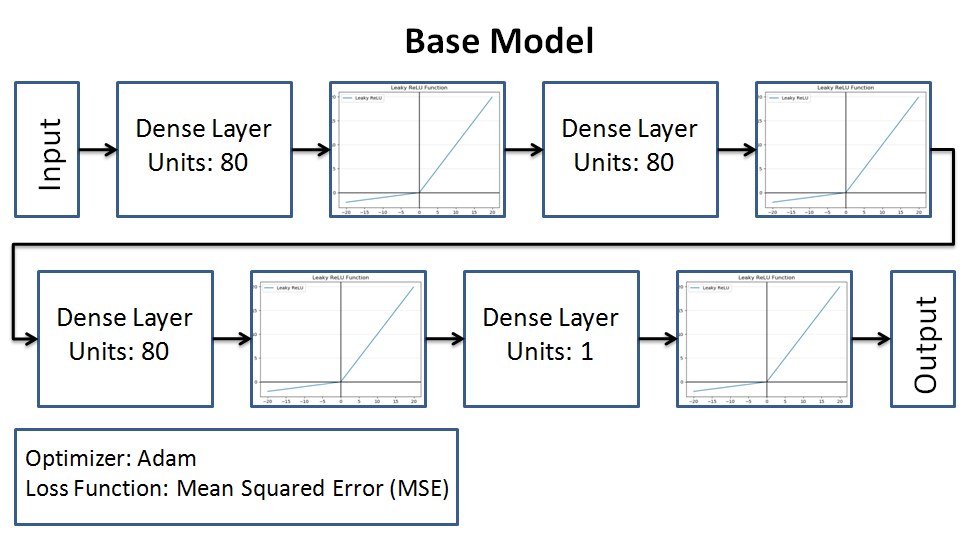


<a id="6.1"></a> <br>
## Confirmed Prediction

In [ ]:
from keras.layers import Input, Dense, Activation, LeakyReLU, Dropout
from keras import models
from keras.optimizers import RMSprop, Adam
df_confirmed = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
df_confirmed.head()

In [ ]:
#Visible = Input(shape= (1,))
#Dense_l1 = Dense(80, name = "Dense_l1")(Visible)
#LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)

#Dense_l2 = Dense(80, name = "Dense_l2")(LRelu_l1)
#LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)

#Dense_l3 = Dense(80, name = "Dense_l3")(LRelu_l2)
#LRelu_l3 = LeakyReLU(name = "LRelu_l3")(Dense_l3)

#Dense_l4 = Dense(1, name = "Dense_l4")(LRelu_l3)
#LRelu_l4 = LeakyReLU(name = "Output")(Dense_l4)

#model = models.Model(inputs = Visible, outputs = LRelu_l4)
#model.compile(optimizer=Adam(lr = 0.001),
#             loss = "mse", #mean_squared_error
#             metrics=["accuracy"]) #metrics.mean_squared_error #mse
#model.summary()

In [ ]:
data_y = np.log10(np.asarray(df_confirmed.iloc[:,5:].sum(axis = 0)).astype("float32"))
data_x = np.arange(1, len(data_y)+1)

In [ ]:
#epochs = 4500 #2750 #1700 #1800 ! #1800! #
#model.fit(data_x.reshape([data_y.shape[0],1]),data_y.reshape([data_y.shape[0],1]),epochs = epochs, shuffle = False)

In [ ]:
#model.save("model_confirmed_v1.h5")

In [ ]:
model_confirmed = models.load_model("/kaggle/input/covid19-models/model_confirmed_v1.h5")
model_confirmed.summary()

In [ ]:
from datetime import datetime, timedelta,date
lakh = 100000
prediction_days = 10

temp_data = df_confirmed.iloc[:,5:].sum(axis = 0)
prediciton_data = np.power(10,model_confirmed.predict(np.arange(1,len(temp_data)+prediction_days+1)))
f = plt.figure(figsize = (15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(temp_data))

plt.plot(date,temp_data/lakh,color = "darkcyan",marker = "o",markerfacecolor = "#ffffff",label = "Actual Curve")

date = np.arange(0,len(prediciton_data))
plt.plot(date,prediciton_data/lakh,color = "crimson",label = "Predicted Curve")

nextdays = [(datetime.strptime(d[-1],"%d %b")+timedelta(days = i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d+nextdays

text = "Prediction for next "+str(prediction_days) + " days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+ str(np.round(prediciton_data[-1*(prediction_days-i)],-3)[0]/lakh)+" L\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment="left",verticalalignment="top",transform = ax.transAxes,bbox=dict(facecolor = "white", alpha = 0.4))

plt.legend()
plt.xlabel("Days")
plt.ylabel("Number of Confirmed Cases (Lakh)")
plt.title("Next 10 Days Confirmed Prediction")
plt.grid(True, alpha = 0.6 )
plt.show()

In [ ]:
length = len(temp_data)+prediction_days+1
confirmed_predicted = prediciton_data[length-10:length]

<a id="6.2"></a> <br>
## Death Prediction

In [ ]:
df_deaths = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")
df_deaths.head()

In [ ]:
#Visible = Input(shape= (1,))
#Dense_l1 = Dense(80, name = "Dense_l1")(Visible)
#LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)

#Dense_l2 = Dense(80, name = "Dense_l2")(LRelu_l1)
#LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)

#Dense_l3 = Dense(80, name = "Dense_l3")(LRelu_l2)
#LRelu_l3 = LeakyReLU(name = "LRelu_l3")(Dense_l3)

#Dense_l4 = Dense(1, name = "Dense_l4")(LRelu_l3)
#LRelu_l4 = LeakyReLU(name = "Output")(Dense_l4)

#model = models.Model(inputs = Visible, outputs = LRelu_l4)
#model.compile(optimizer=Adam(lr = 0.001),
#             loss = "mean_squared_error",
#             metrics=["accuracy"])
#model.summary()

In [ ]:
data_y = np.log10(np.asarray(df_deaths.iloc[:,5:].sum(axis = 0)).astype("float32"))
data_x = np.arange(1, len(data_y)+1)

In [ ]:
#epochs = 5750 #2600! #2700 #2800! #6000! #5500
#model.fit(data_x.reshape([data_y.shape[0],1]),data_y.reshape([data_y.shape[0],1]),epochs = epochs, shuffle = False)

In [ ]:
#model.save("model_death_v1.h5")

In [ ]:
model_death = models.load_model("/kaggle/input/covid19-models/model_death_v1.h5")
model_death.summary()

In [ ]:
thousand = 1000
prediction_days = 10

temp_data = df_deaths.iloc[:,5:].sum(axis = 0)
prediciton_data = np.power(10,model_death.predict(np.arange(1,len(temp_data)+prediction_days+1)))
f = plt.figure(figsize = (15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(temp_data))

plt.plot(date,temp_data/thousand,color = "darkcyan",marker = "o",markerfacecolor = "#ffffff",label = "Actual Curve")

date = np.arange(0,len(prediciton_data))
plt.plot(date,prediciton_data/thousand,color = "crimson",label = "Predicted Curve")

nextdays = [(datetime.strptime(d[-1],"%d %b")+timedelta(days = i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d+nextdays

text = "Prediction for next "+str(prediction_days) + " days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+ str(np.round(prediciton_data[-1*(prediction_days-i)],-3)[0]/thousand)+" K\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment="left",verticalalignment="top",transform = ax.transAxes,bbox=dict(facecolor = "white", alpha = 0.4))

plt.legend()
plt.xlabel("Days")
plt.ylabel("Number of Death Cases (Thousand)")
plt.title("Next 10 Days Death Prediction")
plt.grid(True, alpha = 0.6 )
plt.show()

In [ ]:
length = len(temp_data)+prediction_days+1
death_predicted = prediciton_data[length-10:length]

<a id="6.3"></a> <br>
## Recovered Prediction

In [ ]:
df_recovered = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv")
df_recovered.head()

In [ ]:
#Visible = Input(shape= (1,))
#Dense_l1 = Dense(80, name = "Dense_l1")(Visible)
#LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)

#Dense_l2 = Dense(80, name = "Dense_l2")(LRelu_l1)
#LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)

#Dense_l3 = Dense(80, name = "Dense_l3")(LRelu_l2)
#LRelu_l3 = LeakyReLU(name = "LRelu_l3")(Dense_l3)

#Dense_l4 = Dense(1, name = "Dense_l4")(LRelu_l3)
#LRelu_l4 = LeakyReLU(name = "Output")(Dense_l4)

#model = models.Model(inputs = Visible, outputs = LRelu_l4)
#model.compile(optimizer=Adam(lr = 0.001),
#             loss = "mean_squared_error",
#             metrics=["accuracy"])
#model.summary()

In [ ]:
data_y = np.log10(np.asarray(df_recovered.iloc[:,5:].sum(axis = 0)).astype("float32"))
data_x = np.arange(1, len(data_y)+1)

In [ ]:
#epochs = 7300 #2030 #2359 #2230 #2900 # 8000! #7500
#model.fit(data_x.reshape([data_y.shape[0],1]),data_y.reshape([data_y.shape[0],1]),epochs = epochs)

In [ ]:
#model.save("model_recovered_v1.h5")

In [ ]:
model_recovered = models.load_model("/kaggle/input/covid19-models/model_recovered_v1.h5")
model_recovered.summary()

In [ ]:
from datetime import datetime, timedelta,date
lakh = 100000
prediction_days = 10

temp_data = df_recovered.iloc[:,5:].sum(axis = 0)
prediciton_data = np.power(10,model_recovered.predict(np.arange(1,len(temp_data)+prediction_days+1)))
f = plt.figure(figsize = (15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(temp_data))

plt.plot(date,temp_data/lakh,color = "darkcyan",marker = "o",markerfacecolor = "#ffffff",label = "Actual Curve")

date = np.arange(0,len(prediciton_data))
plt.plot(date,prediciton_data/lakh,color = "crimson",label = "Predicted Curve")

nextdays = [(datetime.strptime(d[-1],"%d %b")+timedelta(days = i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d+nextdays

text = "Prediction for next "+str(prediction_days) + " days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+ str(np.round(prediciton_data[-1*(prediction_days-i)],-3)[0]/lakh)+" L\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment="left",verticalalignment="top",transform = ax.transAxes,bbox=dict(facecolor = "white", alpha = 0.4))

plt.legend()
plt.xlabel("Days")
plt.ylabel("Number of Recovered Cases (Lakh)")
plt.title("Next 10 Days Recoreverd Prediction")
plt.grid(True, alpha = 0.6 )
plt.show()

<a id="6.4"></a> <br>
## Prediction Table

In [ ]:
length = len(temp_data)+prediction_days+1
recovered_predicted = prediciton_data[length-10:length]

predicted_table = {"Confirmed(Predicted)":list(np.int64(confirmed_predicted.reshape(-1))),"Deaths(Predicted)":list(np.int64(death_predicted.reshape(-1))),"Recovered(Predicted)":list(np.int64(recovered_predicted.reshape(-1)))}
predicted_table = pd.DataFrame(data = predicted_table)

predicted_table["Death_percentage(predicted)"] = np.round(100*predicted_table["Deaths(Predicted)"]/predicted_table["Confirmed(Predicted)"],2)
predicted_table["Recover_percentage(predicted)"] = np.round(100*predicted_table["Recovered(Predicted)"]/predicted_table["Confirmed(Predicted)"],2)
predicted_table.style.background_gradient(cmap="Blues",subset =["Confirmed(Predicted)"]).background_gradient(cmap="Reds", subset = ["Deaths(Predicted)"]).background_gradient(cmap="Greens", subset = ["Recovered(Predicted)"]).background_gradient(cmap="OrRd", subset = ["Death_percentage(predicted)"]).background_gradient(cmap="BuGn", subset = ["Recover_percentage(predicted)"]).format("{:.0f}",subset = ["Confirmed(Predicted)","Deaths(Predicted)","Recovered(Predicted)"]).format("{:.2f}",subset = ["Death_percentage(predicted)","Recover_percentage(predicted)"])


* On our **prediction** table it seems like **Covid-19** will be less harmful but more common. If you look at the table **predicted death percentage** is decreasing but **predicted recovered percentage** and **predicted confirmed cases** are increasing in time. 

<a id="7"></a> <br>
# LSTM

In [ ]:
data_lstm = data[["ObservationDate","Confirmed"]]
date_list1 = list(data_lstm["ObservationDate"].unique())
confirmed = []
for i in date_list1:
    x = data_lstm[data_lstm["ObservationDate"] == i]
    confirmed.append(sum(x["Confirmed"]))
data_lstm = pd.DataFrame(list(zip(date_list1,confirmed)),columns = ["Date","Confirmed"])
data_lstm.tail()

In [ ]:
data_lstm = data_lstm.iloc[:,1].values
data_lstm = data_lstm.reshape(-1,1)
data_lstm = data_lstm.astype("float32")
#data_lstm.shape
df = pd.DataFrame(data_lstm)
df.head()

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
data_lstm = scaler.fit_transform(data_lstm)

In [ ]:
train_size = int(len(data_lstm)*0.50)
test_size = len(data_lstm) - train_size
train = data_lstm[0:train_size,:]
test = data_lstm[train_size:len(data_lstm),:]
print("train size: {}, test size: {}".format(len(train),len(test)))

In [ ]:
time_step = 10 #50
datax = []
datay = []
for i in range(len(test)-time_step-1):
    a = train[i:(i+time_step),0]
    datax.append(a)
    datay.append(test[i + time_step, 0])
trainx = np.array(datax)
trainy = np.array(datay)

In [ ]:
datax = []
datay = []
for i in range(len(test)-time_step-1):
    a = test[i:(i+time_step),0]
    datax.append(a)
    datay.append(test[i + time_step, 0])
testx = np.array(datax)
testy = np.array(datay)

In [ ]:
trainx = np.reshape(trainx, (trainx.shape[0], 1 , trainx.shape[1]))
testx = np.reshape(testx, (testx.shape[0], 1 , testx.shape[1]))

In [ ]:
from keras.layers import Dropout
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape =(1,time_step)))
model.add(Dropout(0.1))
model.add(LSTM(50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer="adam")
model.summary()

In [ ]:
hist = model.fit(trainx,trainy, epochs = 100) #, batch_size = 2)

In [ ]:
trainPredict = model.predict(trainx)
testPredict = model.predict(testx)

trainPredict = scaler.inverse_transform(trainPredict)
trainy = scaler.inverse_transform([trainy])
testPredict = scaler.inverse_transform(testPredict)
testy = scaler.inverse_transform([testy])

trainScore = math.sqrt(mean_squared_error(trainy[0], trainPredict[:,0]))
print("train score: %.2f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(testy[0], testPredict[:,0]))
print("test score: %.2f RMSE" % (testScore))

In [ ]:
lstm_loss = hist.history["loss"]
plt.figure(figsize = (13,3))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Losses-Epochs")
plt.grid(True, alpha = 0.5)
plt.plot(lstm_loss)
plt.show()

<a id="8"></a> <br>
# Last 10 Days 

In [ ]:
data_glob = data_glob.tail(10)
data_glob.tail(10)

In [ ]:
trace1 = go.Bar(x = data_glob["Confirmed"],
               y = data_glob["Date"],
               orientation = "h",
               text = data_glob["Confirmed"],
               textposition = "auto",
               name = "Confirmed",
               marker = dict(color = "rgba(4,90,141,0.8)"))
                #,line = dict(color = "rgb(0,0,0)", width = 1.2)))

trace2 = go.Bar(x = data_glob["Deaths"],
               y = data_glob["Date"],
               orientation = "h",
               text = data_glob["Deaths"],
               textposition = "auto",
               name = "Deaths",
               marker = dict(color = "rgba(152,0,67,0.8)"))
                             #,line = dict(color = "rgb(0,0,0)", width = 1.2)))

trace3 = go.Bar(x = data_glob["Recovered"],
               y = data_glob["Date"],
               orientation = "h",
               text = data_glob["Recovered"],
               textposition = "auto",
               name = "Recovered",
               marker = dict(color = "rgba(1,108,89,0.8)"))
                             #,line = dict(color = "rgb(0,0,0)", width = 1.2)))


trace4 = go.Bar(x = data_glob["Active"],
               y = data_glob["Date"],
               orientation = "h",
               text = data_glob["Active"],
               textposition = "auto",
               name = "Active",
               marker = dict(color = "rgba(84,39,143,0.8)"))

data_bar = [trace2,trace4,trace3,trace1]
layout = go.Layout(height = 1000, title = "Last 10 Days", template = "plotly_white",xaxis_title="Value",yaxis_title="Date")
fig = go.Figure(data = data_bar, layout = layout)
iplot(fig)

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=3,cols=1,subplot_titles = ("Death Percentages Last 10 Days","Recovered Percentages Last 10 Days","Active Percentages Last 10 Days"))

death_percent = ((data_glob["Deaths"]*100)/data_glob["Confirmed"])
recovered_percent = ((data_glob["Recovered"]*100)/data_glob["Confirmed"])
active_percent = ((data_glob["Active"]*100)/data_glob["Confirmed"])

fig.append_trace(go.Scatter(x=data_glob["Date"],
                                  y = death_percent,
                                  mode = "lines+markers",
                                  name = "Death Percentage",
                                  marker = dict(color = 'rgba(152,0,67, 0.8)')),row = 1, col = 1)

fig.append_trace(go.Scatter(x=data_glob["Date"],
                                  y = recovered_percent,
                                  mode = "lines+markers",
                                  name = "Recovered Percentage",
                                  marker = dict(color = 'rgba(1,108,89, 0.8)')),row = 2, col = 1)

fig.append_trace(go.Scatter(x=data_glob["Date"],
                                  y = active_percent,
                                  mode = "lines+markers",
                                  name = "Active Percentage",
                                  marker = dict(color = 'rgba(84,39,143, 0.8)')),row = 3, col = 1)

fig.update_layout(height = 700,title = "State Percentages Last 10 Days",template="plotly_white",hovermode='x unified')

fig.update_xaxes(title_text="Dates", row=1, col=1)
fig.update_xaxes(title_text="Dates", row=2, col=1)
fig.update_xaxes(title_text="Dates", row=3, col=1)

fig.update_yaxes(title_text="Percentage(%)", row=1, col=1)
fig.update_yaxes(title_text="Percentage(%)", row=2, col=1)
fig.update_yaxes(title_text="Percentage(%)", row=3, col=1)

iplot(fig)

In [ ]:
trace = go.Bar(
    x = data_glob["Date"],
    y = data_glob["Confirmed"],
    text = data_glob["Confirmed"],
    textposition = "outside",
    marker=dict(color = data_glob["Confirmed"],colorbar=dict(
            title="Colorbar"
        ),colorscale="Blues",))

layout = go.Layout(title = "Confirmed Last 10 Days",template = "plotly_white",yaxis_title="Confirmed",xaxis_title="Date")
fig = go.Figure(data = trace, layout = layout)

iplot(fig)

In [ ]:
trace = go.Bar(
    x = data_glob["Date"],
    y = data_glob["Deaths"],
    text = data_glob["Deaths"],
    textposition = "outside",
    marker=dict(color = data_glob["Deaths"],colorbar=dict(
            title="Colorbar"
        ),colorscale="Reds",))

layout = go.Layout(title = "Deaths Last 10 Days",template = "plotly_white",yaxis_title="Death",xaxis_title="Date")
fig = go.Figure(data = trace, layout = layout)

iplot(fig)

In [ ]:
trace = go.Bar(
    x = data_glob["Date"],
    y = data_glob["Recovered"],
    text = data_glob["Recovered"],
    textposition = "outside",
    marker=dict(color = data_glob["Recovered"],colorbar=dict(
            title="Colorbar"
        ),colorscale="YlGn",))

layout = go.Layout(title = "Recovered Last 10 Days",template = "plotly_white",yaxis_title="Recovered",xaxis_title="Date")
fig = go.Figure(data = trace, layout = layout)

iplot(fig)

In [ ]:
trace = go.Bar(
    x = data_glob["Date"],
    y = data_glob["Active"],
    text = data_glob["Active"],
    textposition = "outside",
    marker=dict(color = data_glob["Active"],colorbar=dict(
            title="Colorbar"
        ),colorscale="Purples",))

layout = go.Layout(title = "Active Last 10 Days",template = "plotly_white",yaxis_title="Active",xaxis_title="Date")
fig = go.Figure(data = trace, layout = layout)

iplot(fig)

<a id="9"></a> <br>
# Covid-19 in 3 Big Countries

<a id="9.1"></a> <br>
## 1. China
* **China:** The country that virus started to spreading.

<a id="9.11"></a> <br>
## Analysis

In [ ]:
china = data[data["Country/Region"] == "Mainland China"]
china.head()

In [ ]:
date_list1 = list(china["ObservationDate"].unique())
confirmed = []
deaths = []
recovered = []
active = []
for i in date_list1:
    x = china[china["ObservationDate"] == i]
    confirmed.append(sum(x["Confirmed"]))
    deaths.append(sum(x["Deaths"]))
    recovered.append(sum(x["Recovered"]))
    active.append(sum(x["Active"]))
china = pd.DataFrame(list(zip(date_list1,confirmed,deaths,recovered,active)),columns = ["Date","Confirmed","Deaths","Recovered","Active"])
china.head()

In [ ]:
report_covid_china = china.tail(1)
print("=======China Covid-19 Report=======\nDate: {}\nTotal Confirmed: {}\nTotal Deaths: {}\nTotal Recovered: {}\nTotal Active: {}\n===================================".format(report_covid_china["Date"].iloc[0],int(report_covid_china["Confirmed"].iloc[0]),int(report_covid_china["Deaths"].iloc[0]),int(report_covid_china["Recovered"].iloc[0]),int(report_covid_china["Active"].iloc[0])))

In [ ]:
trace1 = go.Scatter(
x = china["Date"],
y = china["Confirmed"],
mode = "lines",
name = "Confirmed",
line = dict(width = 2.5),
marker = dict(color = 'rgba(4,90,141, 0.8)')
)

trace2 = go.Scatter(
x = china["Date"],
y = china["Deaths"],
mode = "lines",
name = "Deaths",
line = dict(width = 2.5),
marker = dict(color = 'rgba(152,0,67, 0.8)')
)

trace3 = go.Scatter(
x = china["Date"],
y = china["Recovered"],
mode = "lines",
name = "Recovered",
line = dict(width = 2.5),    
marker = dict(color = 'rgba(1,108,89, 0.8)')
)

trace4 = go.Scatter(
x = china["Date"],
y = china["Active"],
mode = "lines",
name = "Active",
line = dict(width = 2.5),
marker = dict(color = 'rgba(84,39,143, 0.8)')
)

data_plt = [trace1,trace2,trace3,trace4]
layout = go.Layout(title = "China Case States",template = "plotly_white",xaxis_title="Date",yaxis_title="Number of Total Cases",legend=dict(
        x=0,
        y=1,),hovermode='x unified')
fig = go.Figure(data = data_plt,layout = layout)

iplot(fig)

trace1 = go.Scatter(
x = china["Date"],
y = np.log10(china["Confirmed"]),
mode = "lines",
name = "Confirmed",
line = dict(width = 2.5),
marker = dict(color = 'rgba(4,90,141, 0.8)')
)

trace2 = go.Scatter(
x = china["Date"],
y = np.log10(china["Deaths"]),
mode = "lines",
name = "Deaths",
line = dict(width = 2.5),
marker = dict(color = 'rgba(152,0,67, 0.8)')
)

trace3 = go.Scatter(
x = china["Date"],
y = np.log10(china["Recovered"]),
mode = "lines",
name = "Recovered",
line = dict(width = 2.5),    
marker = dict(color = 'rgba(1,108,89, 0.8)')
)

trace4 = go.Scatter(
x = china["Date"],
y = np.log10(china["Active"]),
mode = "lines",
name = "Active",
line = dict(width = 2.5),
marker = dict(color = 'rgba(84,39,143, 0.8)')
)

data_plt = [trace1,trace2,trace3,trace4]
layout = go.Layout(title = "China Case States (Log Scale)",template = "plotly_white",xaxis_title="Date",yaxis_title="Number of Total Cases (Log Scale)",hovermode='x unified')
fig = go.Figure(data = data_plt,layout = layout)

iplot(fig)

In [ ]:
labels = ["Recovered","Deaths","Active"]
values = [china.tail(1)["Recovered"].iloc[0],china.tail(1)["Deaths"].iloc[0],china.tail(1)["Active"].iloc[0]]

fig = go.Figure(data = [go.Pie(labels = labels, values = values,pull = [0.05,0.05,0.05],textinfo='label+percent',insidetextorientation='radial')],layout = go.Layout(title = "China Patient Percentage"))
fig.show()

In [ ]:
death_percent = ((china["Deaths"]*100)/china["Confirmed"])

fig = go.Figure(data = [go.Scatter(x=china["Date"],
                                  y = death_percent,
                                  mode = "lines+markers",
                                  name = "Death Percentage",
                                  marker = dict(color = 'rgba(152,0,67, 0.8)'))],layout = go.Layout(template = "plotly_white",xaxis_title="Date",yaxis_title="Death Percentage(%)",title = "China Death Percentage"))
iplot(fig)

recovered_percent = ((china["Recovered"]*100)/china["Confirmed"])

fig = go.Figure(data = [go.Scatter(x=china["Date"],
                                  y = recovered_percent,
                                  mode = "lines+markers",
                                  name = "Recovered Percentage",
                                  marker = dict(color = 'rgba(1,108,89, 0.8)'))],layout = go.Layout(template = "plotly_white",xaxis_title="Date",yaxis_title="Recovered Percentage(%)",title = "China Recovered Percentage"))
iplot(fig)

active_percent = ((china["Active"]*100)/china["Confirmed"])

fig = go.Figure(data = [go.Scatter(x=china["Date"],
                                  y = active_percent,
                                  mode = "lines+markers",
                                  name = "Active Percentage",
                                  marker = dict(color = 'rgba(84,39,143, 0.8)'))],layout = go.Layout(template = "plotly_white",xaxis_title="Date",yaxis_title="Active Percentage(%)",title = "China Active Percentage"))
iplot(fig)

<a id="9.12"></a> <br>
## Prediction 

<a id="9.121"></a> <br>
### Confirmed Prediction

In [ ]:
df_confirmed = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
china_confirmed = df_confirmed[df_confirmed["Country/Region"] == "China"]
china_confirmed.head()

In [ ]:
#Visible = Input(shape= (1,))
#Dense_l1 = Dense(80, name = "Dense_l1")(Visible)
#LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)

#Dense_l2 = Dense(80, name = "Dense_l2")(LRelu_l1)
#LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)

#Dense_l3 = Dense(80, name = "Dense_l3")(LRelu_l2)
#LRelu_l3 = LeakyReLU(name = "LRelu_l3")(Dense_l3)

#Dense_l4 = Dense(1, name = "Dense_l4")(LRelu_l3)
#LRelu_l4 = LeakyReLU(name = "Output")(Dense_l4)

#model = models.Model(inputs = Visible, outputs = LRelu_l4)
#model.compile(optimizer=Adam(lr = 0.001),
#             loss = "mse", #mean_squared_error
#             metrics=["accuracy"]) #metrics.mean_squared_error #mse
#model.summary()

In [ ]:
data_y = np.log10(np.asarray(china_confirmed.iloc[:,5:].sum(axis = 0)).astype("float32"))
data_x = np.arange(1, len(data_y)+1)

In [ ]:
#epochs = 3600 
#model.fit(data_x.reshape([data_y.shape[0],1]),data_y.reshape([data_y.shape[0],1]),epochs = epochs, shuffle = False)

In [ ]:
#model.save("model_confirmed_china_v1.h5")

In [ ]:
model_confirmed_china = models.load_model("/kaggle/input/covid19-models/model_confirmed_china_v1.h5")
model_confirmed_china.summary()

In [ ]:
from datetime import datetime, timedelta,date
thousand = 10000
prediction_days = 10

temp_data = china_confirmed.iloc[:,5:].sum(axis = 0)
prediciton_data = np.power(10,model_confirmed_china.predict(np.arange(1,len(temp_data)+prediction_days+1)))
f = plt.figure(figsize = (15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(temp_data))

plt.plot(date,temp_data/thousand,color = "darkcyan",marker = "o",markerfacecolor = "#ffffff",label = "Actual Curve")

date = np.arange(0,len(prediciton_data))
plt.plot(date,prediciton_data/thousand,color = "crimson",label = "Predicted Curve")

nextdays = [(datetime.strptime(d[-1],"%d %b")+timedelta(days = i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d+nextdays

text = "Prediction for next "+str(prediction_days) + " days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+ str(np.round(prediciton_data[-1*(prediction_days-i)],-3)[0]/thousand)+" K\n"

plt.text(0.68, 0.78, text, fontsize=17, horizontalalignment="left",verticalalignment="top",transform = ax.transAxes,bbox=dict(facecolor = "white", alpha = 0.4))

plt.legend()
plt.xlabel("Days")
plt.ylabel("Number of Confirmed Cases (Thousand)")
plt.title("Next 10 Days Confirmed Prediction")
plt.grid(True, alpha = 0.6 )
plt.show()

In [ ]:
length = len(temp_data)+prediction_days+1
confirmed_predicted = prediciton_data[length-10:length]

<a id="9.122"></a> <br>
### Death Prediction

In [ ]:
df_deaths = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")
china_deaths = df_deaths[df_deaths["Country/Region"] == "China"]
china_deaths.head()

In [ ]:
#Visible = Input(shape= (1,))
#Dense_l1 = Dense(80, name = "Dense_l1")(Visible)
#LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)

#Dense_l2 = Dense(80, name = "Dense_l2")(LRelu_l1)
#LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)

#Dense_l3 = Dense(80, name = "Dense_l3")(LRelu_l2)
#LRelu_l3 = LeakyReLU(name = "LRelu_l3")(Dense_l3)

#Dense_l4 = Dense(1, name = "Dense_l4")(LRelu_l3)
#LRelu_l4 = LeakyReLU(name = "Output")(Dense_l4)

#model = models.Model(inputs = Visible, outputs = LRelu_l4)
#model.compile(optimizer=Adam(lr = 0.001),
#             loss = "mean_squared_error",
#             metrics=["accuracy"])
#model.summary()

In [ ]:
data_y = np.log10(np.asarray(china_deaths.iloc[:,5:].sum(axis = 0)).astype("float32"))
data_x = np.arange(1, len(data_y)+1)

In [ ]:
#epochs = 3000 
#model.fit(data_x.reshape([data_y.shape[0],1]),data_y.reshape([data_y.shape[0],1]),epochs = epochs, shuffle = False)

In [ ]:
#model.save("model_death_china_v1.h5")

In [ ]:
model_death_china = models.load_model("/kaggle/input/covid19-models/model_death_china_v1.h5")
model_death_china.summary()

In [ ]:
thousand = 1000
prediction_days = 10

temp_data = china_deaths.iloc[:,5:].sum(axis = 0)
prediciton_data = np.power(10,model_death_china.predict(np.arange(1,len(temp_data)+prediction_days+1)))
f = plt.figure(figsize = (15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(temp_data))

plt.plot(date,temp_data/thousand,color = "darkcyan",marker = "o",markerfacecolor = "#ffffff",label = "Actual Curve")

date = np.arange(0,len(prediciton_data))
plt.plot(date,prediciton_data/thousand,color = "crimson",label = "Predicted Curve")

nextdays = [(datetime.strptime(d[-1],"%d %b")+timedelta(days = i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d+nextdays

text = "Prediction for next "+str(prediction_days) + " days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+ str(np.round(prediciton_data[-1*(prediction_days-i)],-3)[0]/thousand)+" K\n"

plt.text(0.68, 0.78, text, fontsize=17, horizontalalignment="left",verticalalignment="top",transform = ax.transAxes,bbox=dict(facecolor = "white", alpha = 0.4))

plt.legend()
plt.xlabel("Days")
plt.ylabel("Number of Death Cases (Thousand)")
plt.title("Next 10 Days Death Prediction")
plt.grid(True, alpha = 0.6 )
plt.show()

In [ ]:
length = len(temp_data)+prediction_days+1
death_predicted = prediciton_data[length-10:length]

<a id="9.123"></a> <br>
### Prediction Table

In [ ]:
length = len(temp_data)+prediction_days+1

predicted_table = {"Confirmed(Predicted)":list(np.int64(confirmed_predicted.reshape(-1))),"Deaths(Predicted)":list(np.int64(death_predicted.reshape(-1)))}
predicted_table = pd.DataFrame(data = predicted_table)

predicted_table["Death_percentage(predicted)"] = np.round(100*predicted_table["Deaths(Predicted)"]/predicted_table["Confirmed(Predicted)"],2)
predicted_table.style.background_gradient(cmap="Blues",subset =["Confirmed(Predicted)"]).background_gradient(cmap="Reds", subset = ["Deaths(Predicted)"]).background_gradient(cmap="OrRd", subset = ["Death_percentage(predicted)"]).format("{:.0f}",subset = ["Confirmed(Predicted)","Deaths(Predicted)"]).format("{:.2f}",subset = ["Death_percentage(predicted)"])

<a id="9.13"></a> <br>
## Last 5 Days

In [ ]:
china = china.tail(5)
china.head(5)

In [ ]:
trace1 = go.Bar(x = china["Confirmed"],
               y = china["Date"],
               orientation = "h",
               text = china["Confirmed"],
               textposition = "auto",
               name = "Confirmed",
               marker = dict(color = "rgba(4,90,141,0.8)"))
                #,line = dict(color = "rgb(0,0,0)", width = 1.2)))

trace2 = go.Bar(x = china["Deaths"],
               y = china["Date"],
               orientation = "h",
               text = china["Deaths"],
               textposition = "auto",
               name = "Deaths",
               marker = dict(color = "rgba(152,0,67,0.8)"))
                             #,line = dict(color = "rgb(0,0,0)", width = 1.2)))

trace3 = go.Bar(x = china["Recovered"],
               y = china["Date"],
               orientation = "h",
               text = china["Recovered"],
               textposition = "auto",
               name = "Recovered",
               marker = dict(color = "rgba(1,108,89,0.8)"))
                             #,line = dict(color = "rgb(0,0,0)", width = 1.2)))

trace4 = go.Bar(x = china["Active"],
               y = china["Date"],
               orientation = "h",
               text = china["Active"],
               textposition = "auto",
               name = "Active",
               marker = dict(color = "rgba(84,39,143,0.8)"))
                             #,line = dict(color = "rgb(0,0,0)", width = 1.2)))

data_bar = [trace4,trace2,trace3,trace1]
layout = go.Layout(height = 1000, title = "Last 5 Days in China", template = "plotly_white",yaxis_title="Date",xaxis_title="Value")
fig = go.Figure(data = data_bar, layout = layout)
iplot(fig)

In [ ]:
fig = make_subplots(rows=3,cols=1,subplot_titles = ("Death Percentages Last 5 Days","Recovered Percentages Last 5 Days","Active Percentages Last 5 Days"))

death_percent = ((china["Deaths"]*100)/china["Confirmed"])
recovered_percent = ((china["Recovered"]*100)/china["Confirmed"])
active_percent = ((china["Active"]*100)/china["Confirmed"])

fig.append_trace(go.Scatter(x=china["Date"],
                                  y = death_percent,
                                  mode = "lines+markers",
                                  name = "Death Percentage",
                                  marker = dict(color = 'rgba(152,0,67, 0.8)')),row = 1, col = 1)

fig.append_trace(go.Scatter(x=china["Date"],
                                  y = recovered_percent,
                                  mode = "lines+markers",
                                  name = "Recovered Percentage",
                                  marker = dict(color = 'rgba(1,108,89, 0.8)')),row = 2, col = 1)

fig.append_trace(go.Scatter(x=china["Date"],
                                  y = active_percent,
                                  mode = "lines+markers",
                                  name = "Active Percentage",
                                  marker = dict(color = 'rgba(84,39,143, 0.8)')),row = 3, col = 1)

fig.update_layout(height = 700,title = "State Percentages Last 5 Days",template="plotly_white",hovermode='x unified')

fig.update_xaxes(title_text="Dates", row=1, col=1)
fig.update_xaxes(title_text="Dates", row=2, col=1)
fig.update_xaxes(title_text="Dates", row=3, col=1)

fig.update_yaxes(title_text="Percentage(%)", row=1, col=1)
fig.update_yaxes(title_text="Percentage(%)", row=2, col=1)
fig.update_yaxes(title_text="Percentage(%)", row=3, col=1)

iplot(fig)

<a id="9.2"></a> <br>
## 2. United States (US)
* **United State (US):** One of the most affected countries and has **most confirmed cases**. 

<a id="9.21"></a> <br>
## Analysis

In [ ]:
us = data[data["Country/Region"] == "US"]
us.head()

In [ ]:
date_list1 = list(us["ObservationDate"].unique())
confirmed = []
deaths = []
recovered = []
active = []
for i in date_list1:
    x = us[us["ObservationDate"] == i]
    confirmed.append(sum(x["Confirmed"]))
    deaths.append(sum(x["Deaths"]))
    recovered.append(sum(x["Recovered"]))
    active.append(sum(x["Active"]))
us = pd.DataFrame(list(zip(date_list1,confirmed,deaths,recovered,active)),columns = ["Date","Confirmed","Deaths","Recovered","Active"])
us.head()

In [ ]:
report_covid_us = us.tail(1)
print("=======US Covid-19 Report=======\nDate: {}\nTotal Confirmed: {}\nTotal Deaths: {}\nTotal Recovered: {}\nTotal Active: {}\n================================".format(report_covid_us["Date"].iloc[0],int(report_covid_us["Confirmed"].iloc[0]),int(report_covid_us["Deaths"].iloc[0]),int(report_covid_us["Recovered"].iloc[0]),int(report_covid_us["Active"].iloc[0])))

In [ ]:
trace1 = go.Scatter(
x = us["Date"],
y = us["Confirmed"],
mode = "lines",
name = "Confirmed",
line = dict(width = 2.5),
marker = dict(color = 'rgba(4,90,141, 0.8)')
)

trace2 = go.Scatter(
x = us["Date"],
y = us["Deaths"],
mode = "lines",
name = "Deaths",
line = dict(width = 2.5),
marker = dict(color = 'rgba(152,0,67, 0.8)')
)

trace3 = go.Scatter(
x = us["Date"],
y = us["Recovered"],
mode = "lines",
name = "Recovered",
line = dict(width = 2.5),    
marker = dict(color = 'rgba(1,108,89, 0.8)')
)

trace4 = go.Scatter(
x = us["Date"],
y = us["Active"],
mode = "lines",
name = "Active",
line = dict(width = 2.5),
marker = dict(color = 'rgba(84,39,143, 0.8)')
)

data_plt = [trace1,trace2,trace3,trace4]
layout = go.Layout(title = "US Case States",template = "plotly_white",xaxis_title="Date",yaxis_title="Number of Total Cases",legend=dict(
        x=0,
        y=1,),hovermode='x unified')
fig = go.Figure(data = data_plt,layout = layout)

iplot(fig)

trace1 = go.Scatter(
x = us["Date"],
y = np.log10(us["Confirmed"]),
mode = "lines",
name = "Confirmed",
line = dict(width = 2.5),
marker = dict(color = 'rgba(4,90,141, 0.8)')
)

trace2 = go.Scatter(
x = us["Date"],
y = np.log10(us["Deaths"]),
mode = "lines",
name = "Deaths",
line = dict(width = 2.5),
marker = dict(color = 'rgba(152,0,67, 0.8)')
)

trace3 = go.Scatter(
x = us["Date"],
y = np.log10(us["Recovered"]),
mode = "lines",
name = "Recovered",
line = dict(width = 2.5),    
marker = dict(color = 'rgba(1,108,89, 0.8)')
)

trace4 = go.Scatter(
x = us["Date"],
y = np.log10(us["Active"]),
mode = "lines",
name = "Active",
line = dict(width = 2.5),
marker = dict(color = 'rgba(84,39,143, 0.8)')
)

data_plt = [trace1,trace2,trace3,trace4]
layout = go.Layout(title = "US Case States (Log Scale)",template = "plotly_white",xaxis_title="Date",yaxis_title="Number of Total Cases (Log Scale)",hovermode='x unified')
fig = go.Figure(data = data_plt,layout = layout)

iplot(fig)

In [ ]:
labels = ["Recovered","Deaths","Active"]
values = [us.tail(1)["Recovered"].iloc[0],us.tail(1)["Deaths"].iloc[0],us.tail(1)["Active"].iloc[0]]

fig = go.Figure(data = [go.Pie(labels = labels, values = values,pull = [0.05,0.05,0.05],textinfo='label+percent',insidetextorientation='radial')],layout = go.Layout(title = "US Patient Percentage"))
fig.show()

In [ ]:
death_percent = ((us["Deaths"]*100)/us["Confirmed"])

fig = go.Figure(data = [go.Scatter(x=us["Date"],
                                  y = death_percent,
                                  mode = "lines+markers",
                                  name = "Death Percentage",
                                  marker = dict(color = 'rgba(152,0,67, 0.8)'))],layout = go.Layout(template = "plotly_white",xaxis_title="Date",yaxis_title="Death Percentage(%)",title = "US Death Percentage"))
iplot(fig)

recovered_percent = ((us["Recovered"]*100)/us["Confirmed"])

fig = go.Figure(data = [go.Scatter(x=us["Date"],
                                  y = recovered_percent,
                                  mode = "lines+markers",
                                  name = "Recovered Percentage",
                                  marker = dict(color = 'rgba(1,108,89, 0.8)'))],layout = go.Layout(template = "plotly_white",xaxis_title="Date",yaxis_title="Recovered Percentage(%)",title = "US Recovered Percentage"))
iplot(fig)

active_percent = ((us["Active"]*100)/us["Confirmed"])

fig = go.Figure(data = [go.Scatter(x=us["Date"],
                                  y = active_percent,
                                  mode = "lines+markers",
                                  name = "Active Percentage",
                                  marker = dict(color = 'rgba(84,39,143, 0.8)'))],layout = go.Layout(template = "plotly_white",xaxis_title="Date",yaxis_title="Active Percentage(%)",title = "US Active Percentage"))
iplot(fig)

<a id="9.22"></a> <br>
## Prediction

<a id="9.221"></a> <br>
### Confirmed Prediction

In [ ]:
df_confirmed = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
us_confirmed = df_confirmed[df_confirmed["Country/Region"] == "US"]
us_confirmed.head()

In [ ]:
#Visible = Input(shape= (1,))
#Dense_l1 = Dense(80, name = "Dense_l1")(Visible)
#LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)

#Dense_l2 = Dense(80, name = "Dense_l2")(LRelu_l1)
#LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)

#Dense_l3 = Dense(80, name = "Dense_l3")(LRelu_l2)
#LRelu_l3 = LeakyReLU(name = "LRelu_l3")(Dense_l3)

#Dense_l4 = Dense(1, name = "Dense_l4")(LRelu_l3)
#LRelu_l4 = LeakyReLU(name = "Output")(Dense_l4)

#model = models.Model(inputs = Visible, outputs = LRelu_l4)
#model.compile(optimizer=Adam(lr = 0.001),
#             loss = "mse", #mean_squared_error
#             metrics=["accuracy"]) #metrics.mean_squared_error #mse
#model.summary()

In [ ]:
data_y = np.log10(np.asarray(us_confirmed.iloc[:,5:].sum(axis = 0)).astype("float32"))
data_x = np.arange(1, len(data_y)+1)

In [ ]:
#epochs = 9200 
#model.fit(data_x.reshape([data_y.shape[0],1]),data_y.reshape([data_y.shape[0],1]),epochs = epochs, shuffle = False)

In [ ]:
#model.save("model_confirmed_us_v1.h5")

In [ ]:
model_confirmed_us = models.load_model("/kaggle/input/covid19-models/model_confirmed_us_v1.h5")
model_confirmed_us.summary()

In [ ]:
from datetime import datetime, timedelta,date
lakh = 100000
prediction_days = 10

temp_data = us_confirmed.iloc[:,5:].sum(axis = 0)
prediciton_data = np.power(10,model_confirmed_us.predict(np.arange(1,len(temp_data)+prediction_days+1)))
f = plt.figure(figsize = (15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(temp_data))

plt.plot(date,temp_data/lakh,color = "darkcyan",marker = "o",markerfacecolor = "#ffffff",label = "Actual Curve")

date = np.arange(0,len(prediciton_data))
plt.plot(date,prediciton_data/lakh,color = "crimson",label = "Predicted Curve")

nextdays = [(datetime.strptime(d[-1],"%d %b")+timedelta(days = i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d+nextdays

text = "Prediction for next "+str(prediction_days) + " days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+ str(np.round(prediciton_data[-1*(prediction_days-i)],-3)[0]/lakh)+" L\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment="left",verticalalignment="top",transform = ax.transAxes,bbox=dict(facecolor = "white", alpha = 0.4))

plt.legend()
plt.xlabel("Days")
plt.ylabel("Number of Confirmed Cases (Thousand)")
plt.title("Next 10 Days Confirmed Prediction")
plt.grid(True, alpha = 0.6 )
plt.show()

In [ ]:
length = len(temp_data)+prediction_days+1
confirmed_predicted = prediciton_data[length-10:length]

<a id="9.222"></a> <br>
### Death Prediction

In [ ]:
df_deaths = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")
us_deaths = df_deaths[df_deaths["Country/Region"] == "US"]
us_deaths.head()

In [ ]:
#Visible = Input(shape= (1,))
#Dense_l1 = Dense(80, name = "Dense_l1")(Visible)
#LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)

#Dense_l2 = Dense(80, name = "Dense_l2")(LRelu_l1)
#LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)

#Dense_l3 = Dense(80, name = "Dense_l3")(LRelu_l2)
#LRelu_l3 = LeakyReLU(name = "LRelu_l3")(Dense_l3)

#Dense_l4 = Dense(80, name = "Dense_l4")(LRelu_l3)
#LRelu_l4 = LeakyReLU(name = "LRelu_l4")(Dense_l4)

#Dense_l5 = Dense(1, name = "Dense_l5")(LRelu_l4)
#LRelu_l5 = LeakyReLU(name = "Output")(Dense_l5)

#model = models.Model(inputs = Visible, outputs = LRelu_l5)
#model.compile(optimizer=Adam(lr = 0.001),
#             loss = "mean_squared_error",
#             metrics=["accuracy"])
#model.summary()

In [ ]:
data_y = np.log10(np.asarray(us_deaths.iloc[:,5:].sum(axis = 0).replace(0,1)).astype("float32"))
data_x = np.arange(1, len(data_y)+1)

In [ ]:
#epochs = 4700
#model.fit(data_x.reshape([data_y.shape[0],1]),data_y.reshape([data_y.shape[0],1]),epochs = epochs, shuffle = True)

In [ ]:
#model.save("model_death_us_v1.h5")

In [ ]:
model_death_us = models.load_model("/kaggle/input/covid19-models/model_death_us_v1.h5")
model_death_us.summary()

In [ ]:
thousand = 1000
prediction_days = 10

temp_data = us_deaths.iloc[:,5:].sum(axis = 0)
prediciton_data = np.power(10,model_death_us.predict(np.arange(1,len(temp_data)+prediction_days+1)))
f = plt.figure(figsize = (15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(temp_data))

plt.plot(date,temp_data/thousand,color = "darkcyan",marker = "o",markerfacecolor = "#ffffff",label = "Actual Curve")

date = np.arange(0,len(prediciton_data))
plt.plot(date,prediciton_data/thousand,color = "crimson",label = "Predicted Curve")

nextdays = [(datetime.strptime(d[-1],"%d %b")+timedelta(days = i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d+nextdays

text = "Prediction for next "+str(prediction_days) + " days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+ str(np.round(prediciton_data[-1*(prediction_days-i)],-3)[0]/thousand)+" K\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment="left",verticalalignment="top",transform = ax.transAxes,bbox=dict(facecolor = "white", alpha = 0.4))

plt.legend()
plt.xlabel("Days")
plt.ylabel("Number of Death Cases (Thousand)")
plt.title("Next 10 Days Death Prediction")
plt.grid(True, alpha = 0.6 )
plt.show()

In [ ]:
length = len(temp_data)+prediction_days+1
death_predicted = prediciton_data[length-10:length]

<a id="9.223"></a> <br>
### Prediction Table

In [ ]:
length = len(temp_data)+prediction_days+1

predicted_table = {"Confirmed(Predicted)":list(np.int64(confirmed_predicted.reshape(-1))),"Deaths(Predicted)":list(np.int64(death_predicted.reshape(-1)))}
predicted_table = pd.DataFrame(data = predicted_table)

predicted_table["Death_percentage(predicted)"] = np.round(100*predicted_table["Deaths(Predicted)"]/predicted_table["Confirmed(Predicted)"],2)
predicted_table.style.background_gradient(cmap="Blues",subset =["Confirmed(Predicted)"]).background_gradient(cmap="Reds", subset = ["Deaths(Predicted)"]).background_gradient(cmap="OrRd", subset = ["Death_percentage(predicted)"]).format("{:.0f}",subset = ["Confirmed(Predicted)","Deaths(Predicted)"]).format("{:.2f}",subset = ["Death_percentage(predicted)"])

<a id="9.23"></a> <br>
## Last 5 Days

In [ ]:
us = us.tail(5)
us.head(5)

In [ ]:
trace1 = go.Bar(x = us["Confirmed"],
               y = us["Date"],
               orientation = "h",
               text = us["Confirmed"],
               textposition = "auto",
               name = "Confirmed",
               marker = dict(color = "rgba(4,90,141,0.8)"))
                #,line = dict(color = "rgb(0,0,0)", width = 1.2)))

trace2 = go.Bar(x = us["Deaths"],
               y = us["Date"],
               orientation = "h",
               text = us["Deaths"],
               textposition = "auto",
               name = "Deaths",
               marker = dict(color = "rgba(152,0,67,0.8)"))
                             #,line = dict(color = "rgb(0,0,0)", width = 1.2)))

trace3 = go.Bar(x = us["Recovered"],
               y = us["Date"],
               orientation = "h",
               text = us["Recovered"],
               textposition = "auto",
               name = "Recovered",
               marker = dict(color = "rgba(1,108,89,0.8)"))
                             #,line = dict(color = "rgb(0,0,0)", width = 1.2)))

trace4 = go.Bar(x = us["Active"],
               y = us["Date"],
               orientation = "h",
               text = us["Active"],
               textposition = "auto",
               name = "Active",
               marker = dict(color = "rgba(84,39,143,0.8)"))
                             #,line = dict(color = "rgb(0,0,0)", width = 1.2)))

data_bar = [trace2,trace3,trace4,trace1]
layout = go.Layout(height = 1000, title = "Last 5 Days in US", template = "plotly_white",yaxis_title="Date",xaxis_title="Value")
fig = go.Figure(data = data_bar, layout = layout)
iplot(fig)

In [ ]:
fig = make_subplots(rows=3,cols=1,subplot_titles = ("Death Percentages Last 5 Days","Recovered Percentages Last 5 Days","Active Percentages Last 5 Days"))

death_percent = ((us["Deaths"]*100)/us["Confirmed"])
recovered_percent = ((us["Recovered"]*100)/us["Confirmed"])
active_percent = ((us["Active"]*100)/us["Confirmed"])

fig.append_trace(go.Scatter(x=us["Date"],
                                  y = death_percent,
                                  mode = "lines+markers",
                                  name = "Death Percentage",
                                  marker = dict(color = 'rgba(152,0,67, 0.8)')),row = 1, col = 1)

fig.append_trace(go.Scatter(x=us["Date"],
                                  y = recovered_percent,
                                  mode = "lines+markers",
                                  name = "Recovered Percentage",
                                  marker = dict(color = 'rgba(1,108,89, 0.8)')),row = 2, col = 1)

fig.append_trace(go.Scatter(x=us["Date"],
                                  y = active_percent,
                                  mode = "lines+markers",
                                  name = "Active Percentage",
                                  marker = dict(color = 'rgba(84,39,143, 0.8)')),row = 3, col = 1)

fig.update_layout(height = 700,title = "State Percentages Last 5 Days",template="plotly_white",hovermode='x unified')

fig.update_xaxes(title_text="Dates", row=1, col=1)
fig.update_xaxes(title_text="Dates", row=2, col=1)
fig.update_xaxes(title_text="Dates", row=3, col=1)

fig.update_yaxes(title_text="Percentage(%)", row=1, col=1)
fig.update_yaxes(title_text="Percentage(%)", row=2, col=1)
fig.update_yaxes(title_text="Percentage(%)", row=3, col=1)

iplot(fig)

<a id="9.3"></a> <br>
## 3. United Kingdom (UK)
* **United Kingdom:** United Kingdom affected very bad from that Covid-19 and has so many death cases. 

<a id="9.31"></a> <br>
## Aalysis

In [ ]:
uk = data[data["Country/Region"] == "UK"]
uk.head()

In [ ]:
date_list1 = list(uk["ObservationDate"].unique())
confirmed = []
deaths = []
recovered = []
active = []
for i in date_list1:
    x = uk[uk["ObservationDate"] == i]
    confirmed.append(sum(x["Confirmed"]))
    deaths.append(sum(x["Deaths"]))
    recovered.append(sum(x["Recovered"]))
    active.append(sum(x["Active"]))
uk = pd.DataFrame(list(zip(date_list1,confirmed,deaths,recovered,active)),columns = ["Date","Confirmed","Deaths","Recovered","Active"])
uk.head()

In [ ]:
report_covid_uk = uk.tail(1)
print("=======UK Covid-19 Report=======\nDate: {}\nTotal Confirmed: {}\nTotal Deaths: {}\nTotal Recovered: {}\nTotal Active: {}\n================================".format(report_covid_uk["Date"].iloc[0],int(report_covid_uk["Confirmed"].iloc[0]),int(report_covid_uk["Deaths"].iloc[0]),int(report_covid_uk["Recovered"].iloc[0]),int(report_covid_uk["Active"].iloc[0])))

In [ ]:
trace1 = go.Scatter(
x = uk["Date"],
y = uk["Confirmed"],
mode = "lines",
name = "Confirmed",
line = dict(width = 2.5),
marker = dict(color = 'rgba(4,90,141, 0.8)')
)

trace2 = go.Scatter(
x = uk["Date"],
y = uk["Deaths"],
mode = "lines",
name = "Deaths",
line = dict(width = 2.5),
marker = dict(color = 'rgba(152,0,67, 0.8)')
)

trace3 = go.Scatter(
x = uk["Date"],
y = uk["Recovered"],
mode = "lines",
name = "Recovered",
line = dict(width = 2.5),    
marker = dict(color = 'rgba(1,108,89, 0.8)')
)

trace4 = go.Scatter(
x = uk["Date"],
y = uk["Active"],
mode = "lines",
name = "Active",
line = dict(width = 2.5),
marker = dict(color = 'rgba(84,39,143, 0.8)')
)

data_plt = [trace1,trace2,trace3,trace4]
layout = go.Layout(title = "UK Case States",template = "plotly_white",xaxis_title="Date",yaxis_title="Number of Total Cases",legend=dict(
        x=0,
        y=1,),hovermode='x unified')
fig = go.Figure(data = data_plt,layout = layout)

iplot(fig)

trace1 = go.Scatter(
x = uk["Date"],
y = np.log10(uk["Confirmed"]),
mode = "lines",
name = "Confirmed",
line = dict(width = 2.5),
marker = dict(color = 'rgba(4,90,141, 0.8)')
)

trace2 = go.Scatter(
x = uk["Date"],
y = np.log10(uk["Deaths"]),
mode = "lines",
name = "Deaths",
line = dict(width = 2.5),
marker = dict(color = 'rgba(152,0,67, 0.8)')
)

trace3 = go.Scatter(
x = uk["Date"],
y = np.log10(uk["Recovered"]),
mode = "lines",
name = "Recovered",
line = dict(width = 2.5),    
marker = dict(color = 'rgba(1,108,89, 0.8)')
)

trace4 = go.Scatter(
x = uk["Date"],
y = np.log10(uk["Active"]),
mode = "lines",
name = "Active",
line = dict(width = 2.5),
marker = dict(color = 'rgba(84,39,143, 0.8)')
)

data_plt = [trace1,trace2,trace3,trace4]
layout = go.Layout(title = "UK Case States (Log Scale)",template = "plotly_white",xaxis_title="Date",yaxis_title="Number of Total Cases (Log Scale)",hovermode='x unified')
fig = go.Figure(data = data_plt,layout = layout)

iplot(fig)

In [ ]:
labels = ["Recovered","Deaths","Active"]
values = [uk.tail(1)["Recovered"].iloc[0],uk.tail(1)["Deaths"].iloc[0],uk.tail(1)["Active"].iloc[0]]

fig = go.Figure(data = [go.Pie(labels = labels, values = values,pull = [0.05,0.05,0.05],textinfo='label+percent',insidetextorientation='radial')],layout = go.Layout(title = "UK Patient Percentage"))
fig.show()

In [ ]:
death_percent = ((uk["Deaths"]*100)/uk["Confirmed"])

fig = go.Figure(data = [go.Scatter(x=uk["Date"],
                                  y = death_percent,
                                  mode = "lines+markers",
                                  name = "Death Percentage",
                                  marker = dict(color = 'rgba(152,0,67, 0.8)'))],layout = go.Layout(template = "plotly_white",xaxis_title="Date",yaxis_title="Death Percentage(%)",title = "UK Death Percentage"))
iplot(fig)

recovered_percent = ((uk["Recovered"]*100)/uk["Confirmed"])

fig = go.Figure(data = [go.Scatter(x=uk["Date"],
                                  y = recovered_percent,
                                  mode = "lines+markers",
                                  name = "Recovered Percentage",
                                  marker = dict(color = 'rgba(1,108,89, 0.8)'))],layout = go.Layout(template = "plotly_white",xaxis_title="Date",yaxis_title="Recovered Percentage(%)",title = "UK Recovered Percentage"))
iplot(fig)

active_percent = ((uk["Active"]*100)/uk["Confirmed"])

fig = go.Figure(data = [go.Scatter(x=uk["Date"],
                                  y = active_percent,
                                  mode = "lines+markers",
                                  name = "Active Percentage",
                                  marker = dict(color = 'rgba(84,39,143, 0.8)'))],layout = go.Layout(template = "plotly_white",xaxis_title="Date",yaxis_title="Active Percentage(%)",title = "UK Active Percentage"))
iplot(fig)

<a id="9.32"></a> <br>
## Prediction

<a id="9.321"></a> <br>
### Confirmed Prediction

In [ ]:
df_confirmed = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
uk_confirmed = df_confirmed[df_confirmed["Country/Region"] == "United Kingdom"]
uk_confirmed.head()

In [ ]:
#Visible = Input(shape= (1,))
#Dense_l1 = Dense(80, name = "Dense_l1")(Visible)
#LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)

#Dense_l2 = Dense(80, name = "Dense_l2")(LRelu_l1)
#LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)

#Dense_l3 = Dense(80, name = "Dense_l3")(LRelu_l2)
#LRelu_l3 = LeakyReLU(name = "LRelu_l3")(Dense_l3)

#Dense_l4 = Dense(1, name = "Dense_l4")(LRelu_l3)
#LRelu_l4 = LeakyReLU(name = "Output")(Dense_l4)

#model = models.Model(inputs = Visible, outputs = LRelu_l4)
#model.compile(optimizer=Adam(lr = 0.001),
#             loss = "mse", #mean_squared_error
#             metrics=["accuracy"]) #metrics.mean_squared_error #mse
#model.summary()

In [ ]:
data_y = np.log10(np.asarray(uk_confirmed.iloc[:,5:].sum(axis = 0).replace(0,1)).astype("float32"))
data_x = np.arange(1, len(data_y)+1)

In [ ]:
#epochs = 4800 #9000!
#model.fit(data_x.reshape([data_y.shape[0],1]),data_y.reshape([data_y.shape[0],1]),epochs = epochs, shuffle = False)

In [ ]:
#model.save("model_confirmed_uk_v1.h5")

In [ ]:
model_confirmed_uk = models.load_model("/kaggle/input/covid19-models/model_confirmed_uk_v1.h5")
model_confirmed_uk.summary()

In [ ]:
from datetime import datetime, timedelta,date
lakh = 100000
prediction_days = 10

temp_data = uk_confirmed.iloc[:,5:].sum(axis = 0)
prediciton_data = np.power(10,model_confirmed_uk.predict(np.arange(1,len(temp_data)+prediction_days+1)))
f = plt.figure(figsize = (15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(temp_data))

plt.plot(date,temp_data/lakh,color = "darkcyan",marker = "o",markerfacecolor = "#ffffff",label = "Actual Curve")

date = np.arange(0,len(prediciton_data))
plt.plot(date,prediciton_data/lakh,color = "crimson",label = "Predicted Curve")

nextdays = [(datetime.strptime(d[-1],"%d %b")+timedelta(days = i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d+nextdays

text = "Prediction for next "+str(prediction_days) + " days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+ str(np.round(prediciton_data[-1*(prediction_days-i)],-3)[0]/lakh)+" L\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment="left",verticalalignment="top",transform = ax.transAxes,bbox=dict(facecolor = "white", alpha = 0.4))

plt.legend()
plt.xlabel("Days")
plt.ylabel("Number of Confirmed Cases (Thousand)")
plt.title("Next 10 Days Confirmed Prediction")
plt.grid(True, alpha = 0.6 )
plt.show()

In [ ]:
length = len(temp_data)+prediction_days+1
confirmed_predicted = prediciton_data[length-10:length]

<a id="9.322"></a> <br>
### Death Prediction

In [ ]:
df_deaths = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")
uk_deaths = df_deaths[df_deaths["Country/Region"] == "United Kingdom"]
uk_deaths.head()

In [ ]:
#Visible = Input(shape= (1,))
#Dense_l1 = Dense(80, name = "Dense_l1")(Visible)
#LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)

#Dense_l2 = Dense(80, name = "Dense_l2")(LRelu_l1)
#LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)

#Dense_l3 = Dense(80, name = "Dense_l3")(LRelu_l2)
#LRelu_l3 = LeakyReLU(name = "LRelu_l3")(Dense_l3)

#Dense_l4 = Dense(1, name = "Dense_l4")(LRelu_l3)
#LRelu_l4 = LeakyReLU(name = "Output")(Dense_l4)

#model = models.Model(inputs = Visible, outputs = LRelu_l4)
#model.compile(optimizer=Adam(lr = 0.001),
#             loss = "mean_squared_error",
#             metrics=["accuracy"])
#model.summary()

In [ ]:
data_y = np.log10(np.asarray(uk_deaths.iloc[:,5:].sum(axis = 0).replace(0,1)).astype("float32"))
data_x = np.arange(1, len(data_y)+1)

In [ ]:
#epochs = 6300 
#model.fit(data_x.reshape([data_y.shape[0],1]),data_y.reshape([data_y.shape[0],1]),epochs = epochs, shuffle = True)

In [ ]:
#model.save("model_death_uk_v1.h5")

In [ ]:
model_death_uk = models.load_model("/kaggle/input/covid19-models/model_death_uk_v1.h5")
model_death_uk.summary()

In [ ]:
thousand = 1000
prediction_days = 10

temp_data = uk_deaths.iloc[:,5:].sum(axis = 0)
prediciton_data = np.power(10,model_death_uk.predict(np.arange(1,len(temp_data)+prediction_days+1)))
f = plt.figure(figsize = (15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(temp_data))

plt.plot(date,temp_data/thousand,color = "darkcyan",marker = "o",markerfacecolor = "#ffffff",label = "Actual Curve")

date = np.arange(0,len(prediciton_data))
plt.plot(date,prediciton_data/thousand,color = "crimson",label = "Predicted Curve")

nextdays = [(datetime.strptime(d[-1],"%d %b")+timedelta(days = i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d+nextdays

text = "Prediction for next "+str(prediction_days) + " days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+ str(np.round(prediciton_data[-1*(prediction_days-i)],-3)[0]/thousand)+" K\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment="left",verticalalignment="top",transform = ax.transAxes,bbox=dict(facecolor = "white", alpha = 0.4))

plt.legend()
plt.xlabel("Days")
plt.ylabel("Number of Death Cases (Thousand)")
plt.title("Next 10 Days Death Prediction")
plt.grid(True, alpha = 0.6 )
plt.show()

In [ ]:
length = len(temp_data)+prediction_days+1
death_predicted = prediciton_data[length-10:length]

<a id="9.323"></a> <br>
### Prediction Table

In [ ]:
length = len(temp_data)+prediction_days+1

predicted_table = {"Confirmed(Predicted)":list(np.int64(confirmed_predicted.reshape(-1))),"Deaths(Predicted)":list(np.int64(death_predicted.reshape(-1)))}
predicted_table = pd.DataFrame(data = predicted_table)

predicted_table["Death_percentage(predicted)"] = np.round(100*predicted_table["Deaths(Predicted)"]/predicted_table["Confirmed(Predicted)"],2)
predicted_table.style.background_gradient(cmap="Blues",subset =["Confirmed(Predicted)"]).background_gradient(cmap="Reds", subset = ["Deaths(Predicted)"]).background_gradient(cmap="OrRd", subset = ["Death_percentage(predicted)"]).format("{:.0f}",subset = ["Confirmed(Predicted)","Deaths(Predicted)"]).format("{:.2f}",subset = ["Death_percentage(predicted)"])

<a id="9.33"></a> <br>
## Last 5 Days

In [ ]:
uk = uk.tail(5)
uk.head(5)

In [ ]:
trace1 = go.Bar(x = uk["Confirmed"],
               y = uk["Date"],
               orientation = "h",
               text = uk["Confirmed"],
               textposition = "auto",
               name = "Confirmed",
               marker = dict(color = "rgba(4,90,141,0.8)"))
                #,line = dict(color = "rgb(0,0,0)", width = 1.2)))

trace2 = go.Bar(x = uk["Deaths"],
               y = uk["Date"],
               orientation = "h",
               text = uk["Deaths"],
               textposition = "auto",
               name = "Deaths",
               marker = dict(color = "rgba(152,0,67,0.8)"))
                             #,line = dict(color = "rgb(0,0,0)", width = 1.2)))

trace3 = go.Bar(x = uk["Recovered"],
               y = uk["Date"],
               orientation = "h",
               text = uk["Recovered"],
               textposition = "auto",
               name = "Recovered",
               marker = dict(color = "rgba(1,108,89,0.8)"))
                             #,line = dict(color = "rgb(0,0,0)", width = 1.2)))

trace4 = go.Bar(x = uk["Active"],
               y = uk["Date"],
               orientation = "h",
               text = uk["Active"],
               textposition = "auto",
               name = "Active",
               marker = dict(color = "rgba(84,39,143,0.8)"))
                             #,line = dict(color = "rgb(0,0,0)", width = 1.2)))

data_bar = [trace3,trace2,trace4,trace1]
layout = go.Layout(height = 1000, title = "Last 5 Days in UK", template = "plotly_white",yaxis_title="Date",xaxis_title="Value")
fig = go.Figure(data = data_bar, layout = layout)
iplot(fig)

In [ ]:
fig = make_subplots(rows=3,cols=1,subplot_titles = ("Death Percentages Last 5 Days","Recovered Percentages Last 5 Days","Active Percentages Last 5 Days"))

death_percent = ((uk["Deaths"]*100)/uk["Confirmed"])
recovered_percent = ((uk["Recovered"]*100)/uk["Confirmed"])
active_percent = ((uk["Active"]*100)/uk["Confirmed"])

fig.append_trace(go.Scatter(x=uk["Date"],
                                  y = death_percent,
                                  mode = "lines+markers",
                                  name = "Death Percentage",
                                  marker = dict(color = 'rgba(152,0,67, 0.8)')),row = 1, col = 1)

fig.append_trace(go.Scatter(x=uk["Date"],
                                  y = recovered_percent,
                                  mode = "lines+markers",
                                  name = "Recovered Percentage",
                                  marker = dict(color = 'rgba(1,108,89, 0.8)')),row = 2, col = 1)

fig.append_trace(go.Scatter(x=uk["Date"],
                                  y = active_percent,
                                  mode = "lines+markers",
                                  name = "Active Percentage",
                                  marker = dict(color = 'rgba(84,39,143, 0.8)')),row = 3, col = 1)

fig.update_layout(height = 700,title = "State Percentages Last 5 Days",template="plotly_white",hovermode='x unified')

fig.update_xaxes(title_text="Dates", row=1, col=1)
fig.update_xaxes(title_text="Dates", row=2, col=1)
fig.update_xaxes(title_text="Dates", row=3, col=1)

fig.update_yaxes(title_text="Percentage(%)", row=1, col=1)
fig.update_yaxes(title_text="Percentage(%)", row=2, col=1)
fig.update_yaxes(title_text="Percentage(%)", row=3, col=1)

iplot(fig)

<a id="10"></a> <br>
# Patient Data

In [ ]:
released = patient[patient["state"] == "released"]
isolated = patient[patient["state"] == "isolated"]
deceased = patient[patient["state"] == "deceased"]

fig = make_subplots(rows=4, cols=1,subplot_titles = ("All States Age Frequency","Released Age Frequency","Isolated Age Frequency","Deceased Age Frequency"))

fig.append_trace(go.Histogram(x = patient["age"],
                             name = "All States Age Frequency"),row = 1, col = 1)
fig.append_trace(go.Histogram(x = released["age"],
                             name = "Released Age Frequency"),row = 2, col = 1)
fig.append_trace(go.Histogram(x = isolated["age"],
                             name = "Isolated Age Frequency"),row = 3, col = 1)
fig.append_trace(go.Histogram(x = deceased["age"],
                             name = "Deceased Age Frequency"),row = 4, col = 1)

fig.update_xaxes(title_text="Age", row=1, col=1)
fig.update_xaxes(title_text="Age", row=2, col=1)
fig.update_xaxes(title_text="Age", row=3, col=1)
fig.update_xaxes(title_text="Age", row=4, col=1)

fig.update_yaxes(title_text="Frequency", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=2, col=1)
fig.update_yaxes(title_text="Frequency", row=3, col=1)
fig.update_yaxes(title_text="Frequency", row=4, col=1)

fig.update_layout(template = "plotly_white",hovermode='x unified',height = 1200)

fig.show()

In [ ]:
state_list_patient = ["Released","Isolated","Deceased"]

values = [len(released),len(isolated),len(deceased)]

fig = go.Figure(data = [go.Pie(labels = state_list_patient, values = values,pull = [0.1,0.1,0.1],textinfo='label+percent',insidetextorientation='radial')],layout = go.Layout(title = "Patient State Percentages"))
fig.show()

* On this chart most of the patients **isolated**(do not forget this data is just a small sample of patients).

In [ ]:
female = patient[patient["sex"] == "female"]
male = patient[patient["sex"] == "male"]

patient_gender = ["Male","Female"]

values = [len(male),len(female)]

fig = go.Figure(data = [go.Pie(labels = patient_gender, values = values,pull = [0.01,0.01],textinfo='label+percent',insidetextorientation='radial')],layout = go.Layout(title = "Gender Percentages"))
fig.show()

* On this chart seems like there is not that much difference between male and female.

In [ ]:
fig = go.Figure(data = [go.Bar(x = ["Released","Isolated","Deceased"],
                       y = [len(released[released["sex"] == "male"]),len(isolated[isolated["sex"] == "male"]),len(deceased[deceased["sex"] == "male"])],
                       name = "Male"),
                       go.Bar(x = ["Released","Isolated","Deceased"],
                               y = [len(released[released["sex"] == "female"]),len(isolated[isolated["sex"] == "female"]),len(deceased[deceased["sex"] == "female"])],
                               name = "Female")],layout = go.Layout(template = "plotly_white", 
                                                                    xaxis_title = "States",
                                                                    yaxis_title = "Number of Patients",
                                                                    title = "State of Patients According to Their Gender",
                                                                    hovermode='x unified'))

fig.show()

In [ ]:
fig = go.Figure(data = [go.Histogram(x = male["age"],
                            name = "Male",
                            opacity = 1),
                       go.Histogram(x = female["age"],
                            name = "Female",
                            opacity = 1)],
                layout = go.Layout(template = "plotly_white",
                                   hovermode = "x unified",
                                   xaxis_title = "Age", 
                                   yaxis_title = "Frequency",
                                  title = "Age Frequencies According to Gender"))
fig.show()

fig = go.Figure(data = [go.Box(x = male["age"],
                              name = "Male"),
                       go.Box(x = female["age"],
                             name = "Female")],
               layout = go.Layout(template = "plotly_white",
                                  xaxis_title = "Age", 
                                  yaxis_title = "Gender",
                                  title = "Age Boxplots According to Gender"))
fig.show()

In [ ]:
fig = go.Figure(go.Histogram(x = patient.infection_reason,
                            name = "All"))

fig.update_layout(xaxis={'categoryorder':'total descending'},
                  template = "plotly_white",
                  xaxis_title = "Infection Reason", 
                  yaxis_title = "Frequency",
                  title = "Infection Reasons",
                 hovermode = "x unified")

fig.show()

fig = go.Figure(go.Histogram(x = male.infection_reason,
                            name = "Male"))

fig.update_layout(xaxis={'categoryorder':'total descending'},
                  template = "plotly_white",
                  xaxis_title = "Infection Reason", 
                  yaxis_title = "Frequency",
                  title = "Infection Reasons of Males",
                 hovermode = "x unified")

fig.show()

fig = go.Figure(go.Histogram(x = female.infection_reason))

fig.update_layout(xaxis={'categoryorder':'total descending'},
                  template = "plotly_white",
                  xaxis_title = "Infection Reason", 
                  yaxis_title = "Frequency",
                  title = "Infection Reasons of Females",
                 hovermode = "x unified")

fig.show()

In [ ]:
fig = px.pie(values = patient.groupby(["infection_reason"]).size().values, 
             names = patient.groupby(["infection_reason"]).size().index)

fig.update_layout(title = "Infection Reasons Piechart")

iplot(fig)

<a id="11"></a> <br>
# Covid-19 Classification From Lungs X-Rays
* Covid-19 is a virus type that has impact on **lungs** so we can find out is a person has Covid-19 or not with **lungs x-rays**. We can use **deep learning** for classifying these x-rays. 

In [ ]:
DATASET_DIR = "../input/covid-19-x-ray-10000-images/dataset"

os.listdir(DATASET_DIR)

In [ ]:
normal_images =[]

for img_path in glob.glob(DATASET_DIR + "/normal/*"):
    normal_images.append(mpimg.imread(img_path))
    
fig = plt.figure()
fig.suptitle("Normal Lungs")
plt.imshow(normal_images[0], cmap="gray")
plt.show()

In [ ]:
covid_images = []
for img_path in glob.glob(DATASET_DIR + "/covid/*"): 
    covid_images.append(mpimg.imread(img_path))
    
fig = plt.figure()
fig.suptitle("Covid-19 Patient's Lungs ")
plt.imshow(covid_images[0], cmap = "gray")
plt.show()

In [ ]:
print(str(len(normal_images))+" normal patient images")
print(str(len(covid_images))+" covid patient images")

In [ ]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 48
BATCH_SIZE = 6

<a id="11.1"></a> <br>
## CNN Model 
* To classify images we will use a architecture called **Convolutional Neural Network(CNN)**. This model is mostly using for classify images and so succesful in this area.  

* **Our model's diagram:**
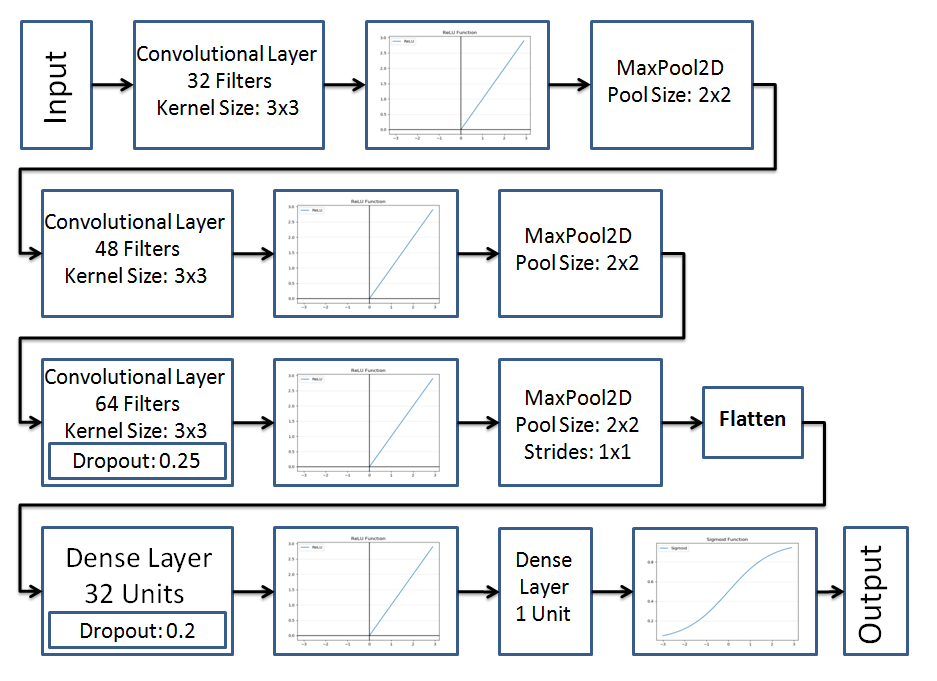

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = INPUT_SHAPE, activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 48, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2), strides = (1,1)))
model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

# compile 
model.compile(loss = "binary_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [ ]:
model.summary()

In [ ]:
#from tensorflow.keras.utils import plot_model
#plot_model(model)

<a id="11.2"></a> <br>
## Training 

In [ ]:
#generators
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  validation_split = 0.25)

train_generator = train_datagen.flow_from_directory(
DATASET_DIR,
target_size = (IMG_H, IMG_W),
batch_size = BATCH_SIZE,
class_mode = "binary",
subset = "training")

validation_generator = train_datagen.flow_from_directory(
DATASET_DIR,
target_size = (IMG_H,IMG_W),
batch_size = BATCH_SIZE,
class_mode ="binary",
shuffle = False,
subset = "validation")

#fitting
hist = model.fit_generator(
train_generator,
steps_per_epoch = train_generator.samples//BATCH_SIZE,
validation_data = validation_generator,
validation_steps = validation_generator.samples // BATCH_SIZE,
epochs = EPOCHS)

In [ ]:
# model save
model.save("model_cnn_x-ray_v1.h5")

<a id="11.3"></a> <br>
## Result

In [ ]:
plt.figure(figsize = (13,7))
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
#plt.text(23,0.5,"Current Training Accuracy: "+str(np.round(hist.history["accuracy"][-1]*100,2))+"%",fontsize = 18,color = "black")
#plt.text(23,0.46,"Current Validation Accuracy: "+str(np.round(hist.history["val_accuracy"][-1]*100,2))+"%",fontsize = 18,color = "black")
plt.show()


In [ ]:
plt.figure(figsize = (13,7))
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
#plt.text(26,0.8,"Current Training Loss: "+str(np.round(hist.history["loss"][-1],3)),fontsize = 18,color = "black")
#plt.text(26,0.73,"Current Validation Loss: "+str(np.round(hist.history["val_loss"][-1],3)),fontsize = 18,color = "black")
plt.show()

In [ ]:
print("Training Accuracy: "+str(np.round(hist.history["accuracy"][-1]*100,2))+"%")
print("Validation Accuracy: "+str(np.round(hist.history["val_accuracy"][-1]*100,2))+"%")

In [ ]:
label = validation_generator.classes
pred = model.predict(validation_generator)
predicted_class_indices = np.argmax(pred, axis = 1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print(labels)
print(predictions)

In [ ]:
#predicting your images (covid = 0, normal = 1) 

#from tensorflow.keras.preprocessing import image

#def predict_your_images(filepath)
    #img = image.load_img(str(filepath), target_size = (150,150,3))

    #X = image.img_to_array(img)
    #X = np.expand_dims(X, axis = 0)

    #prediction = model.predict(X)
    #if prediction == 0:
    #    print("Covid-19")

    #else: 
    #    print("Normal")

    #plt.imshow(img)
    #plt.show()

    #print(prediction)

<a id="11.4"></a> <br>
## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(predicted_class_indices, label)
cm

In [ ]:
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(cm,annot = True, linewidths = 0.3,cmap = "Blues",annot_kws = {"size": 18}, linecolor = "black", fmt = ".0f", ax=ax )
plt.xlabel("Prediction")
plt.title("Confusion Matrix")
plt.ylabel("True")
plt.show()

<a id="12"></a> <br>
# Conclusion
* ### If there is something wrong with this kernel please let me know in the comments.
* ### You can check out my other kernels here: https://www.kaggle.com/mrhippo/notebooks
* ### I will keep that kernel updated.